# 🥑 模型对比

对比基础机器学习模型，包括：
1. 线性模型：多元线性回归、岭回归、自适应稀疏回归
2. 树模型：决策树回归、极端树回归
3. SVM、KNN、MLP
4. 集成学习：随机森林回归、极端森林回归、Adaboost、GBDT、XGBoost、LightGBM、直方图梯度提升回归、CatBoost回归

In [2]:
from PyAqua.aqua_plots import plot_pearsonr
import matplotlib.pyplot as plt 

In [1]:
# 导入加利福尼亚房价数据
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split as TTS

data = fetch_california_housing()
print(data.keys())

# 划分数据集
x = data['data']
y = data['target']
train_x, test_x, train_y, test_y = TTS(x, y, test_size=0.2, random_state=22)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


## 壹丨模型对比

### 1. 线性模型

多元线性回归: 0.6094


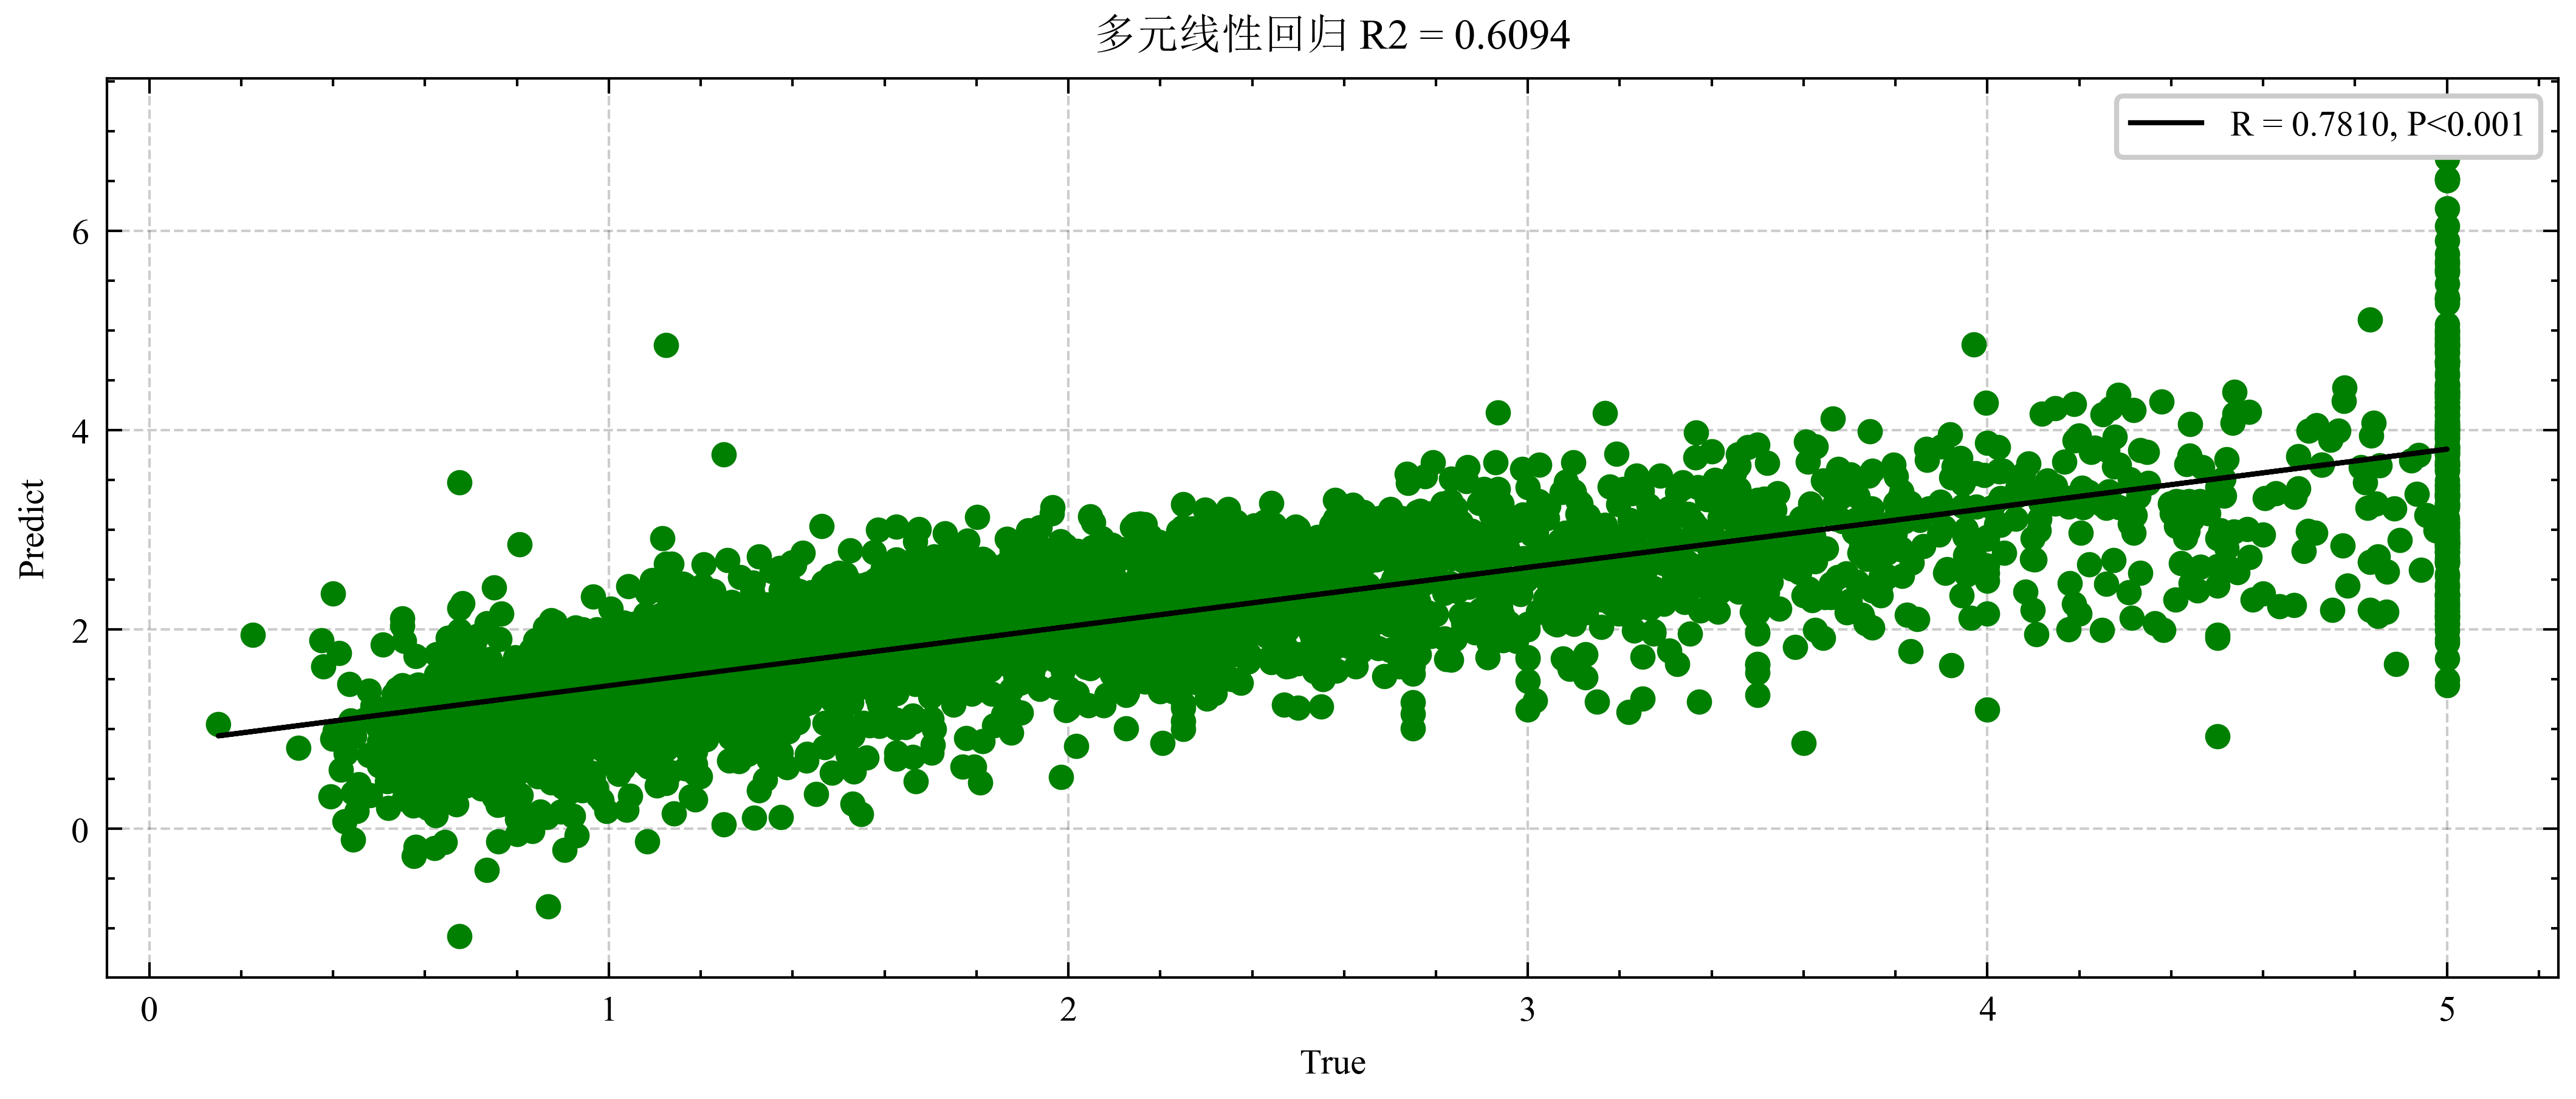

岭回归: 0.5969


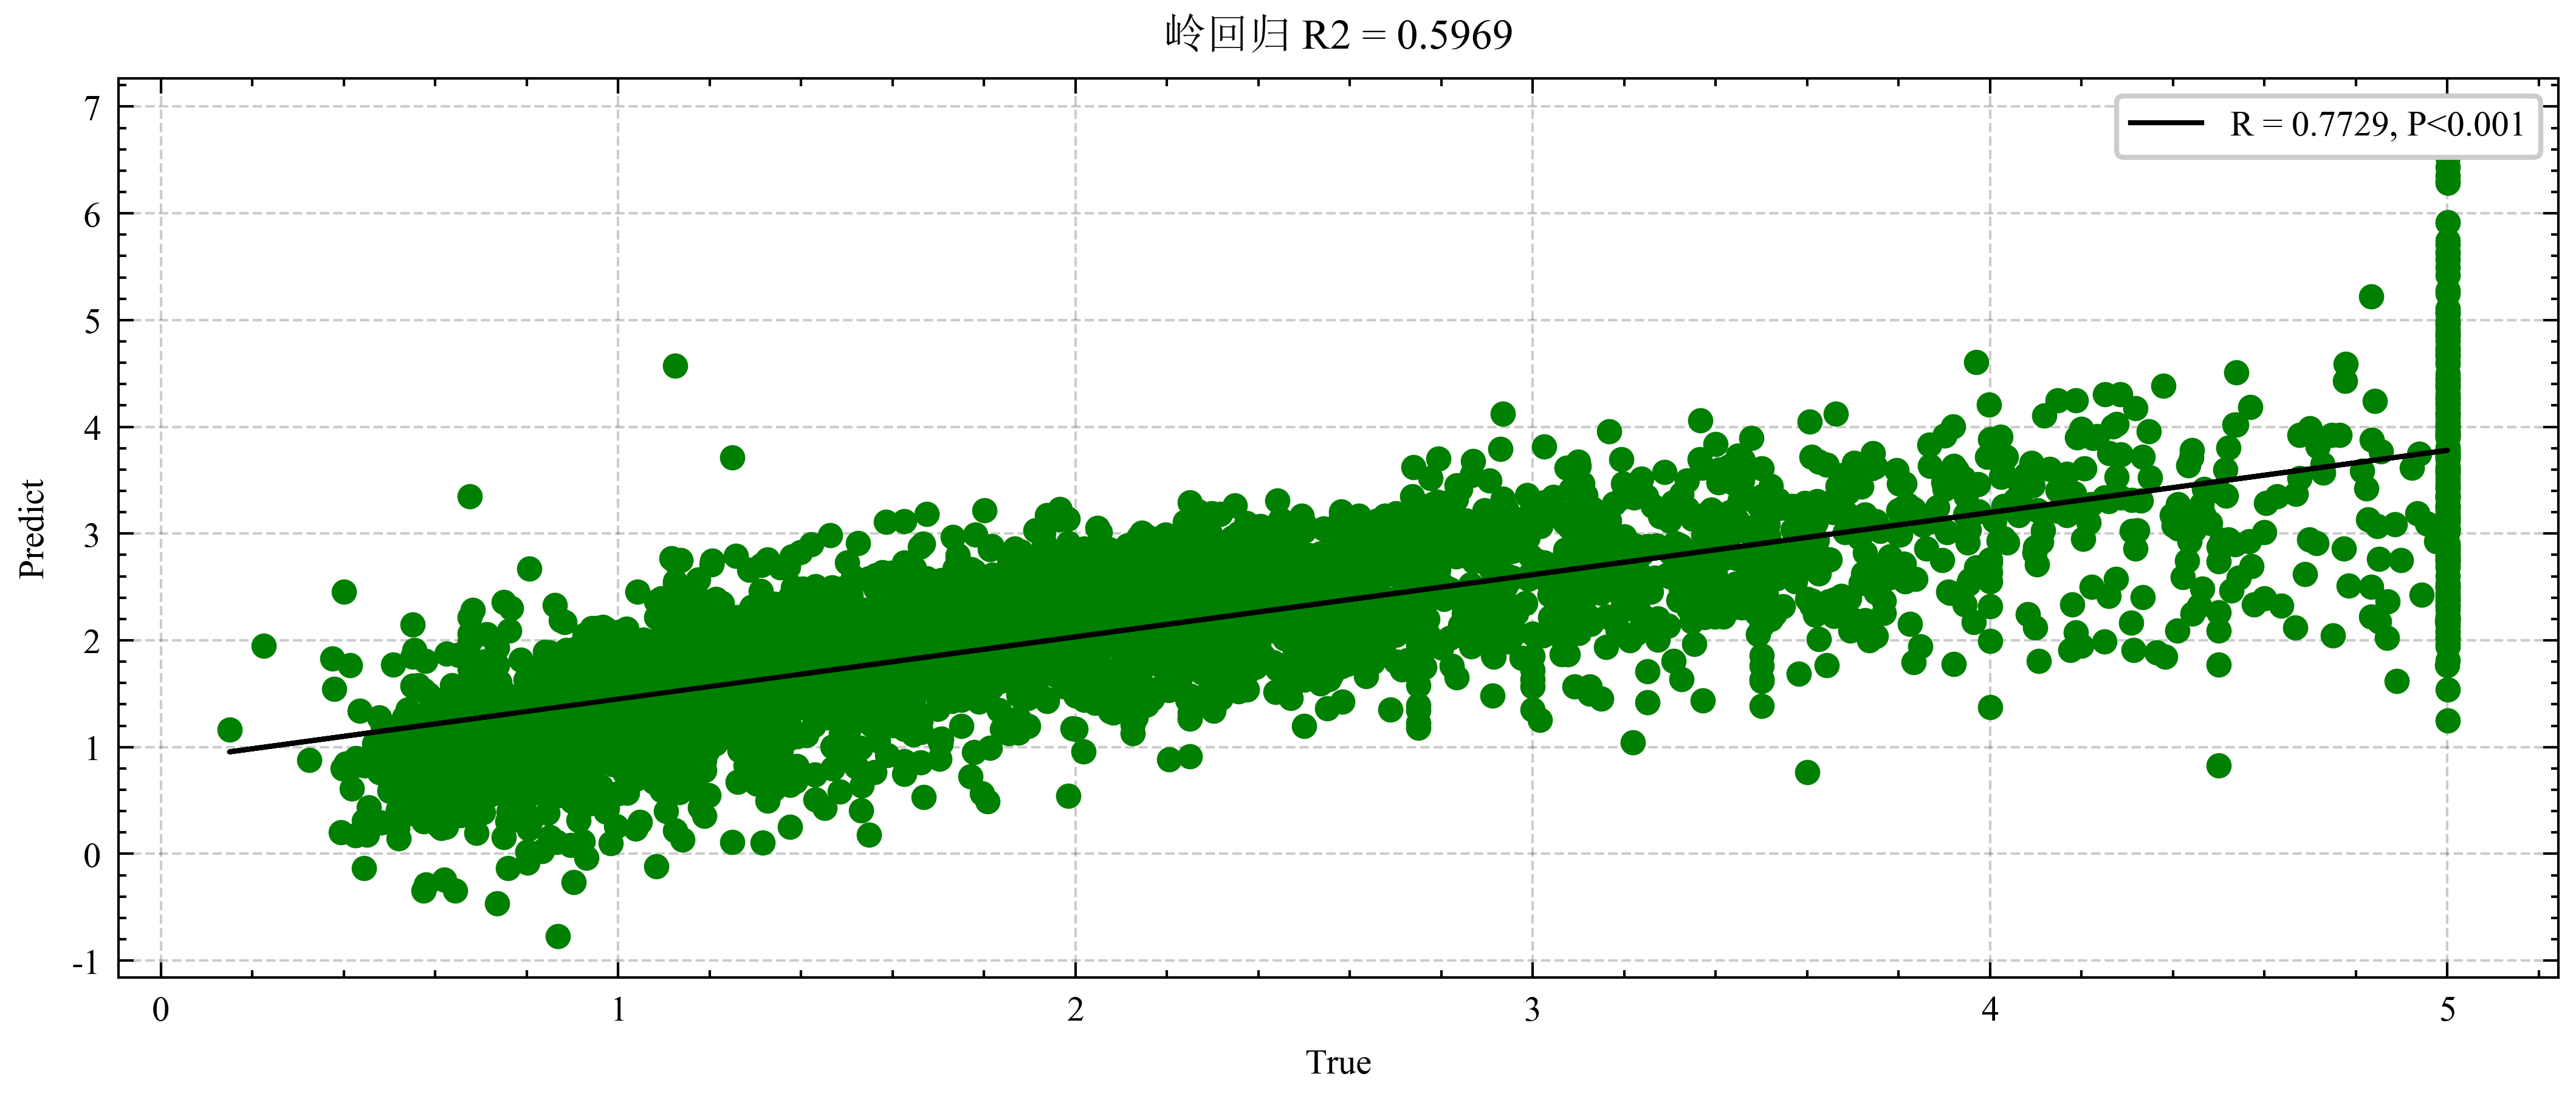

In [3]:
from sklearn.linear_model import LinearRegression, ARDRegression

names = ['多元线性回归', '岭回归', '自适应稀疏回归']
regs = [LinearRegression(), ARDRegression()]
for name, reg in zip(names, regs):
    reg.fit(train_x, train_y)

    r2 = reg.score(test_x, test_y)
    pred = reg.predict(test_x)
    print(f'{name}: {r2:.4f}')
    plot_pearsonr(test_y, pred, title=f'{name} R2 = {r2:.4f}')
    plt.show()

### 2. 树模型

决策树回归: 0.6129


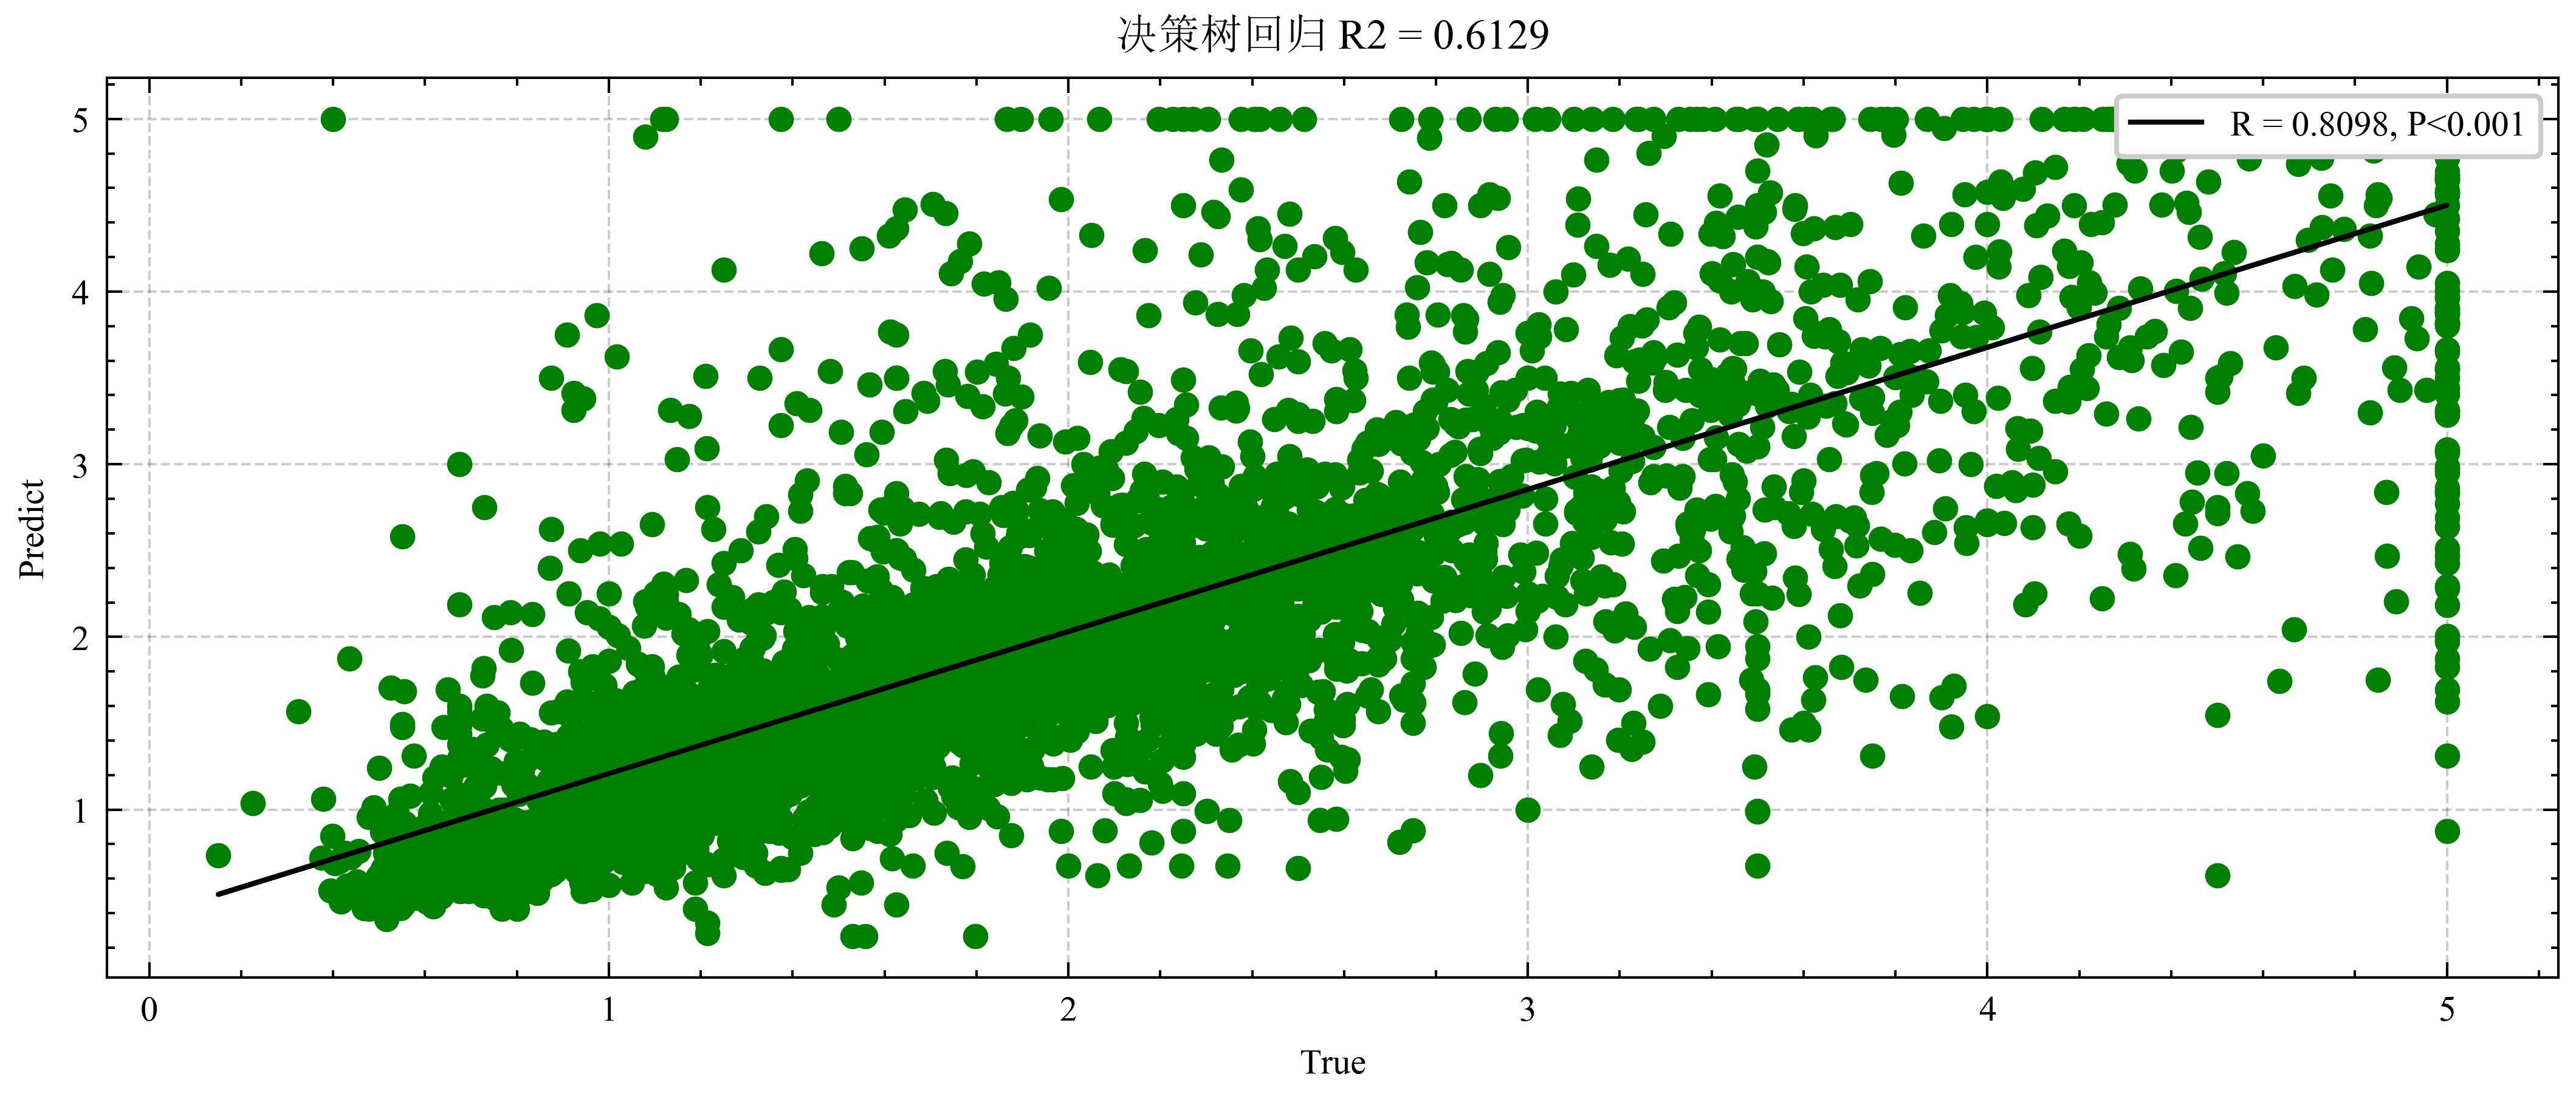

极端树回归: 0.5803


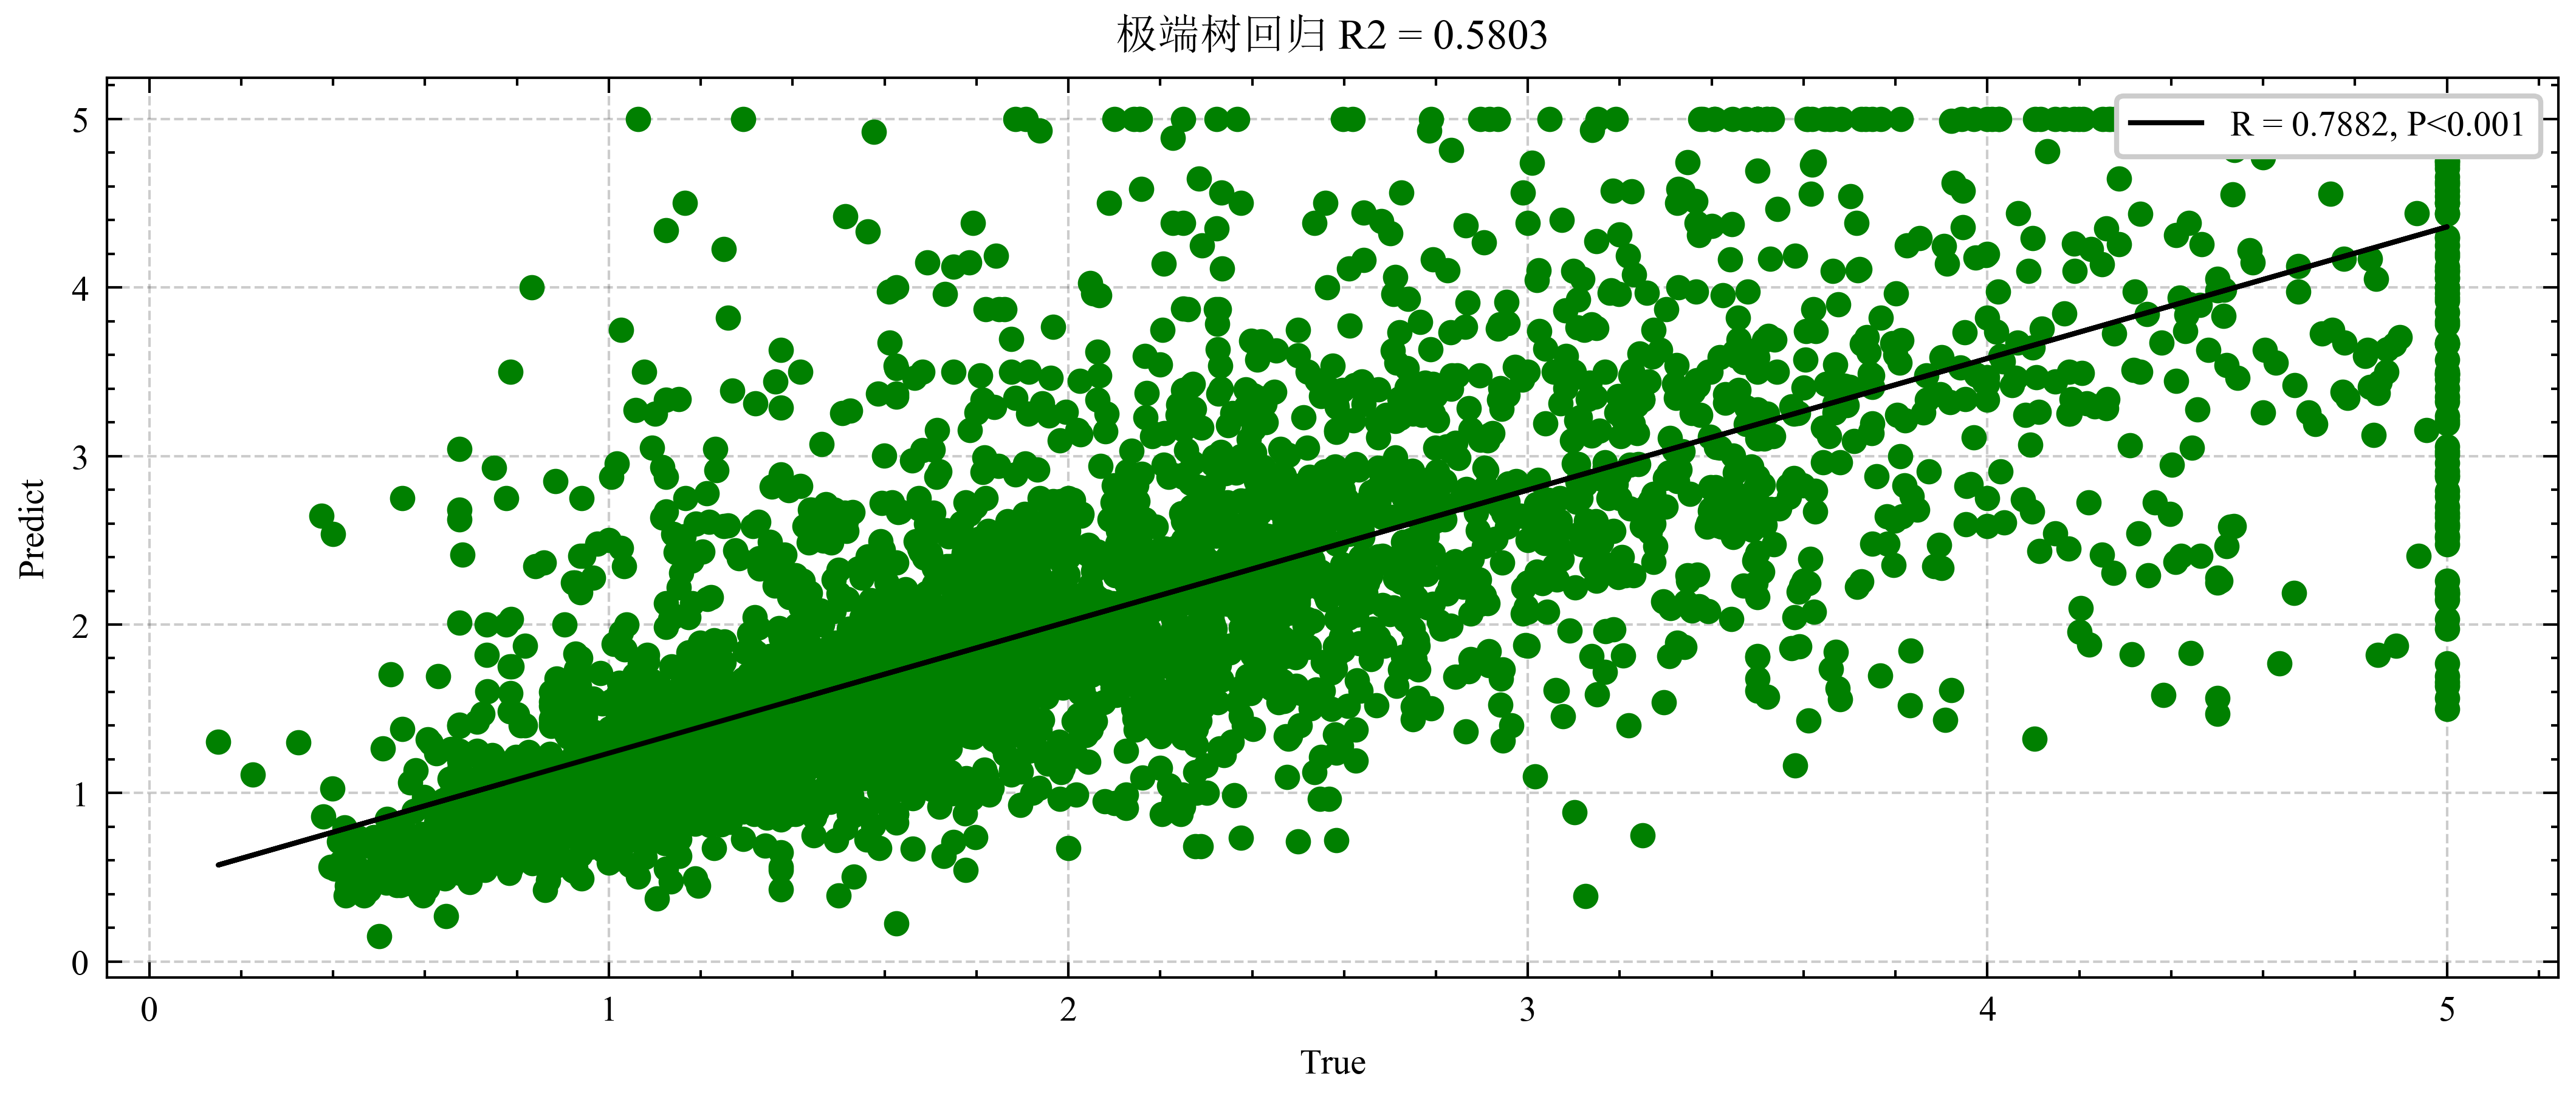

In [4]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

names = ['决策树回归', '极端树回归']
regs = [DecisionTreeRegressor(), ExtraTreeRegressor()]
for name, reg in zip(names, regs):
    reg.fit(train_x, train_y)
    r2 = reg.score(test_x, test_y)
    pred = reg.predict(test_x)

    print(f'{name}: {r2:.4f}')
    plot_pearsonr(test_y, pred, title=f'{name} R2 = {r2:.4f}')
    plt.show()

### 3. SVR、KNN、MLP

SVR回归: -0.0258


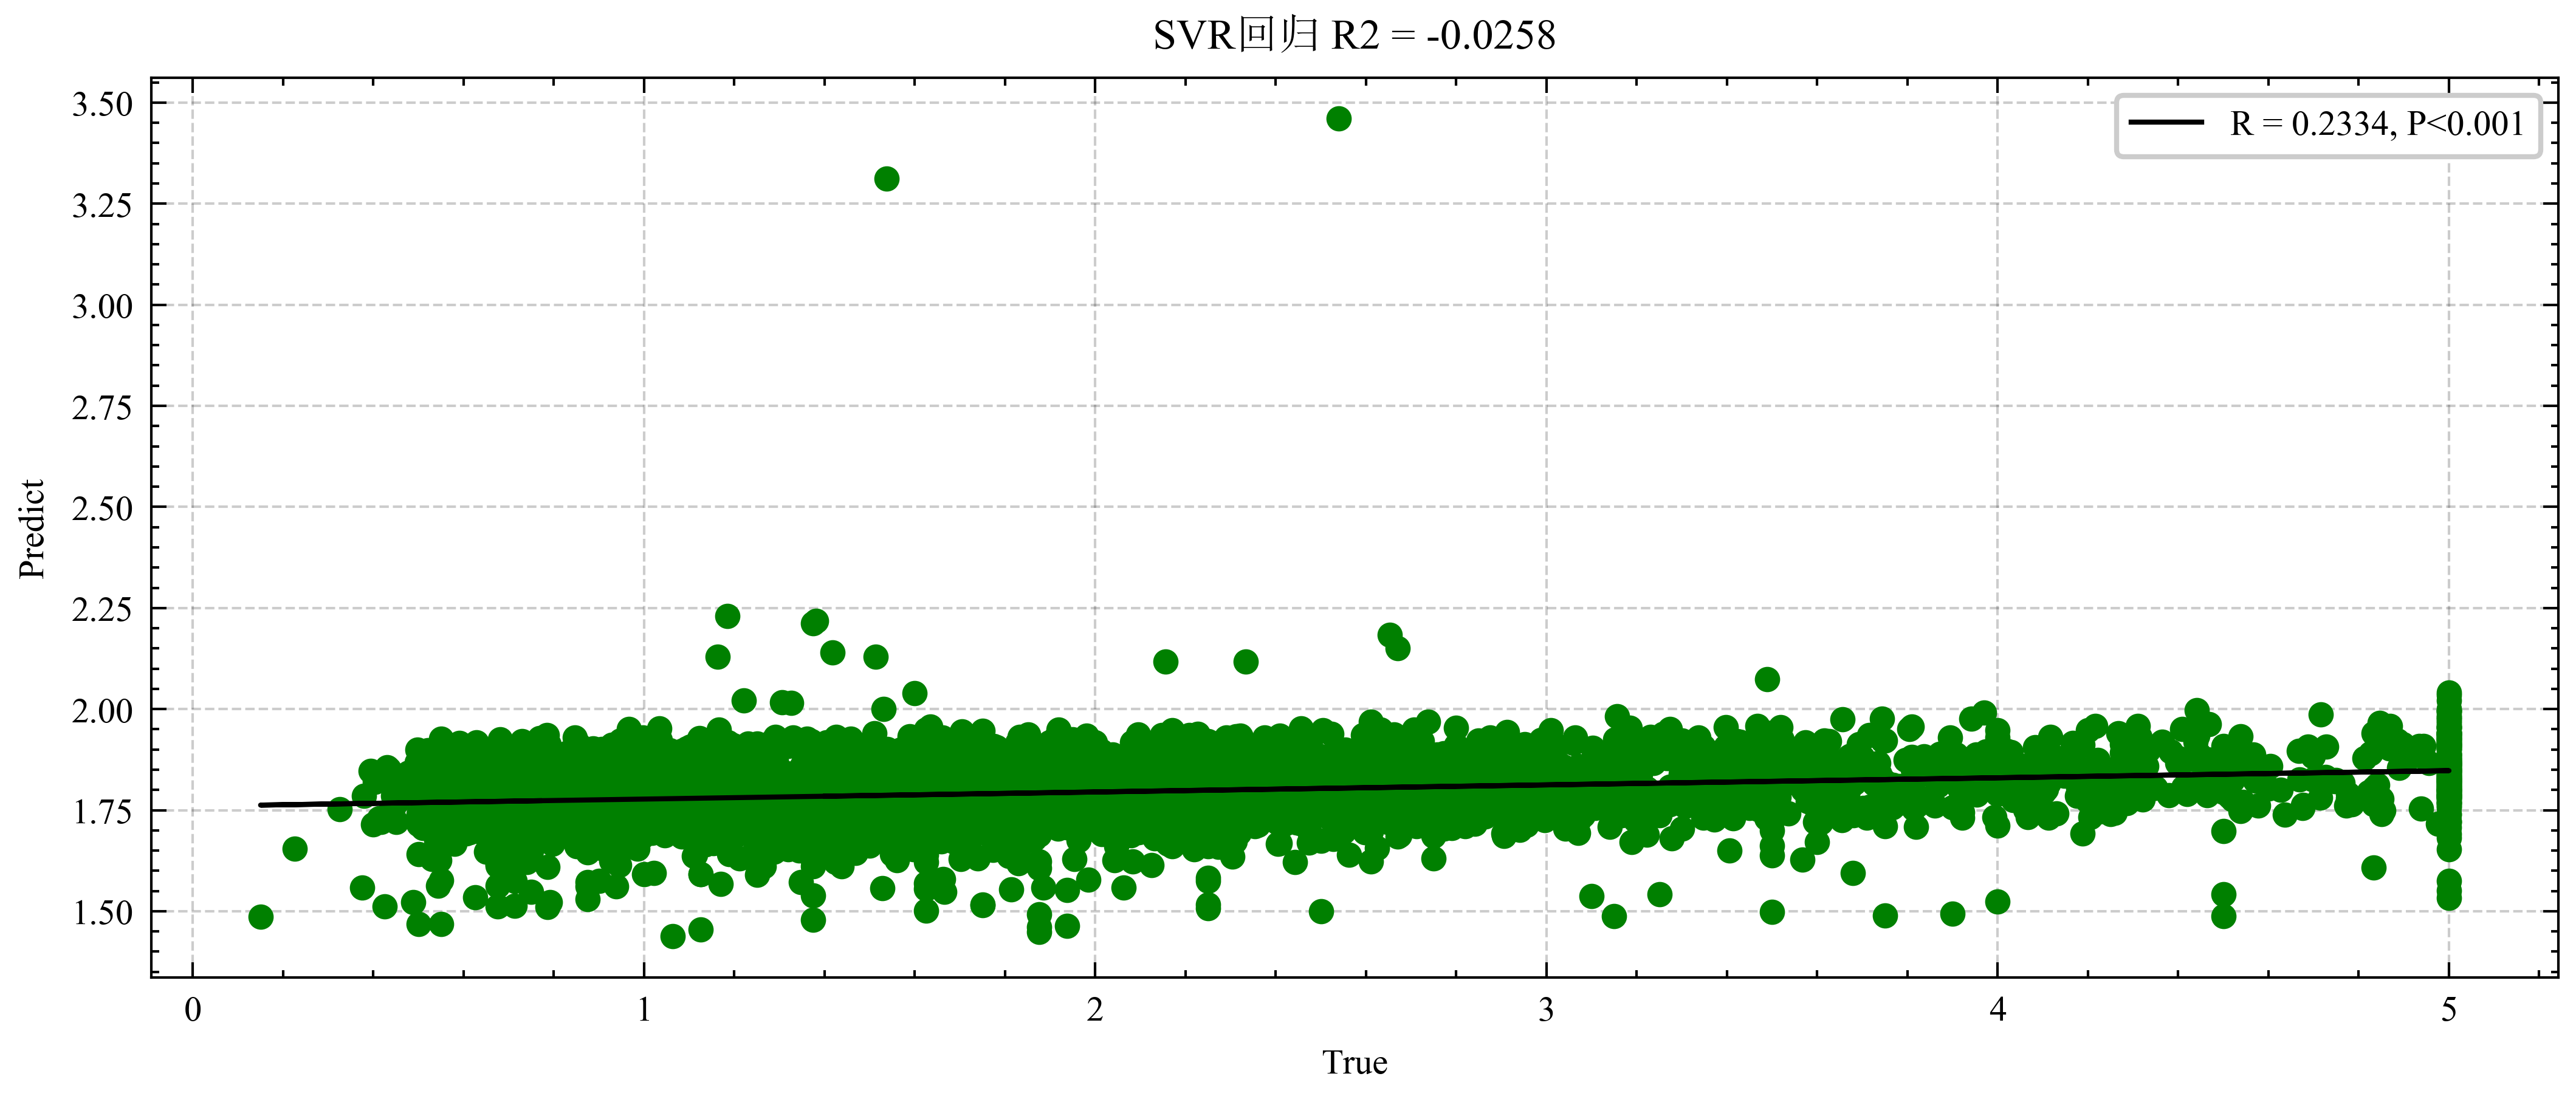

KNN回归: 0.1549


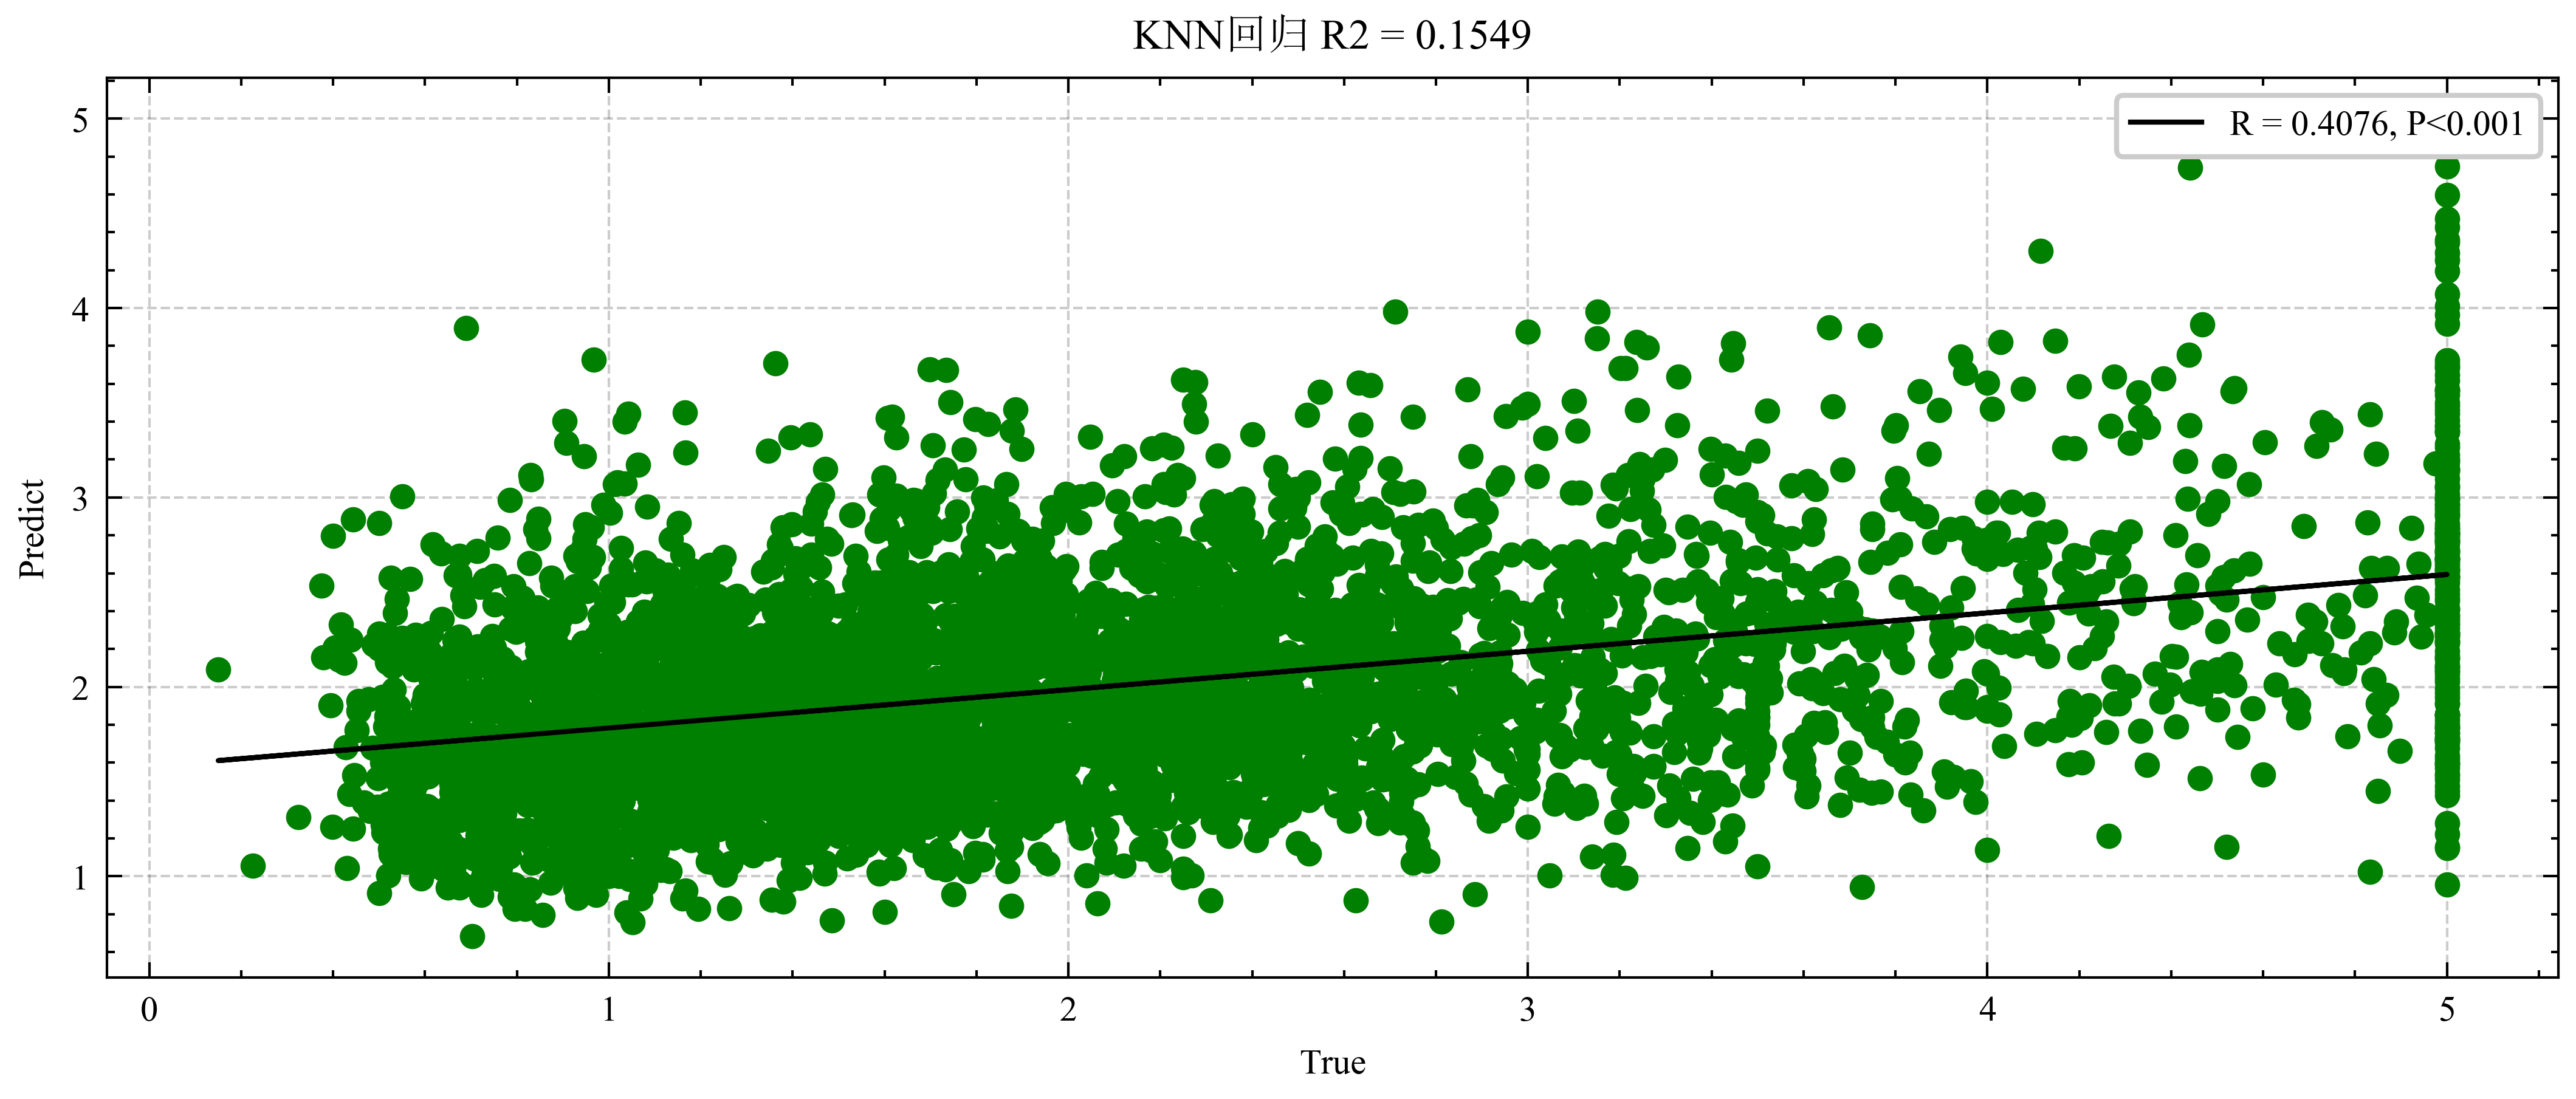

多层感知机回归: -3.1114


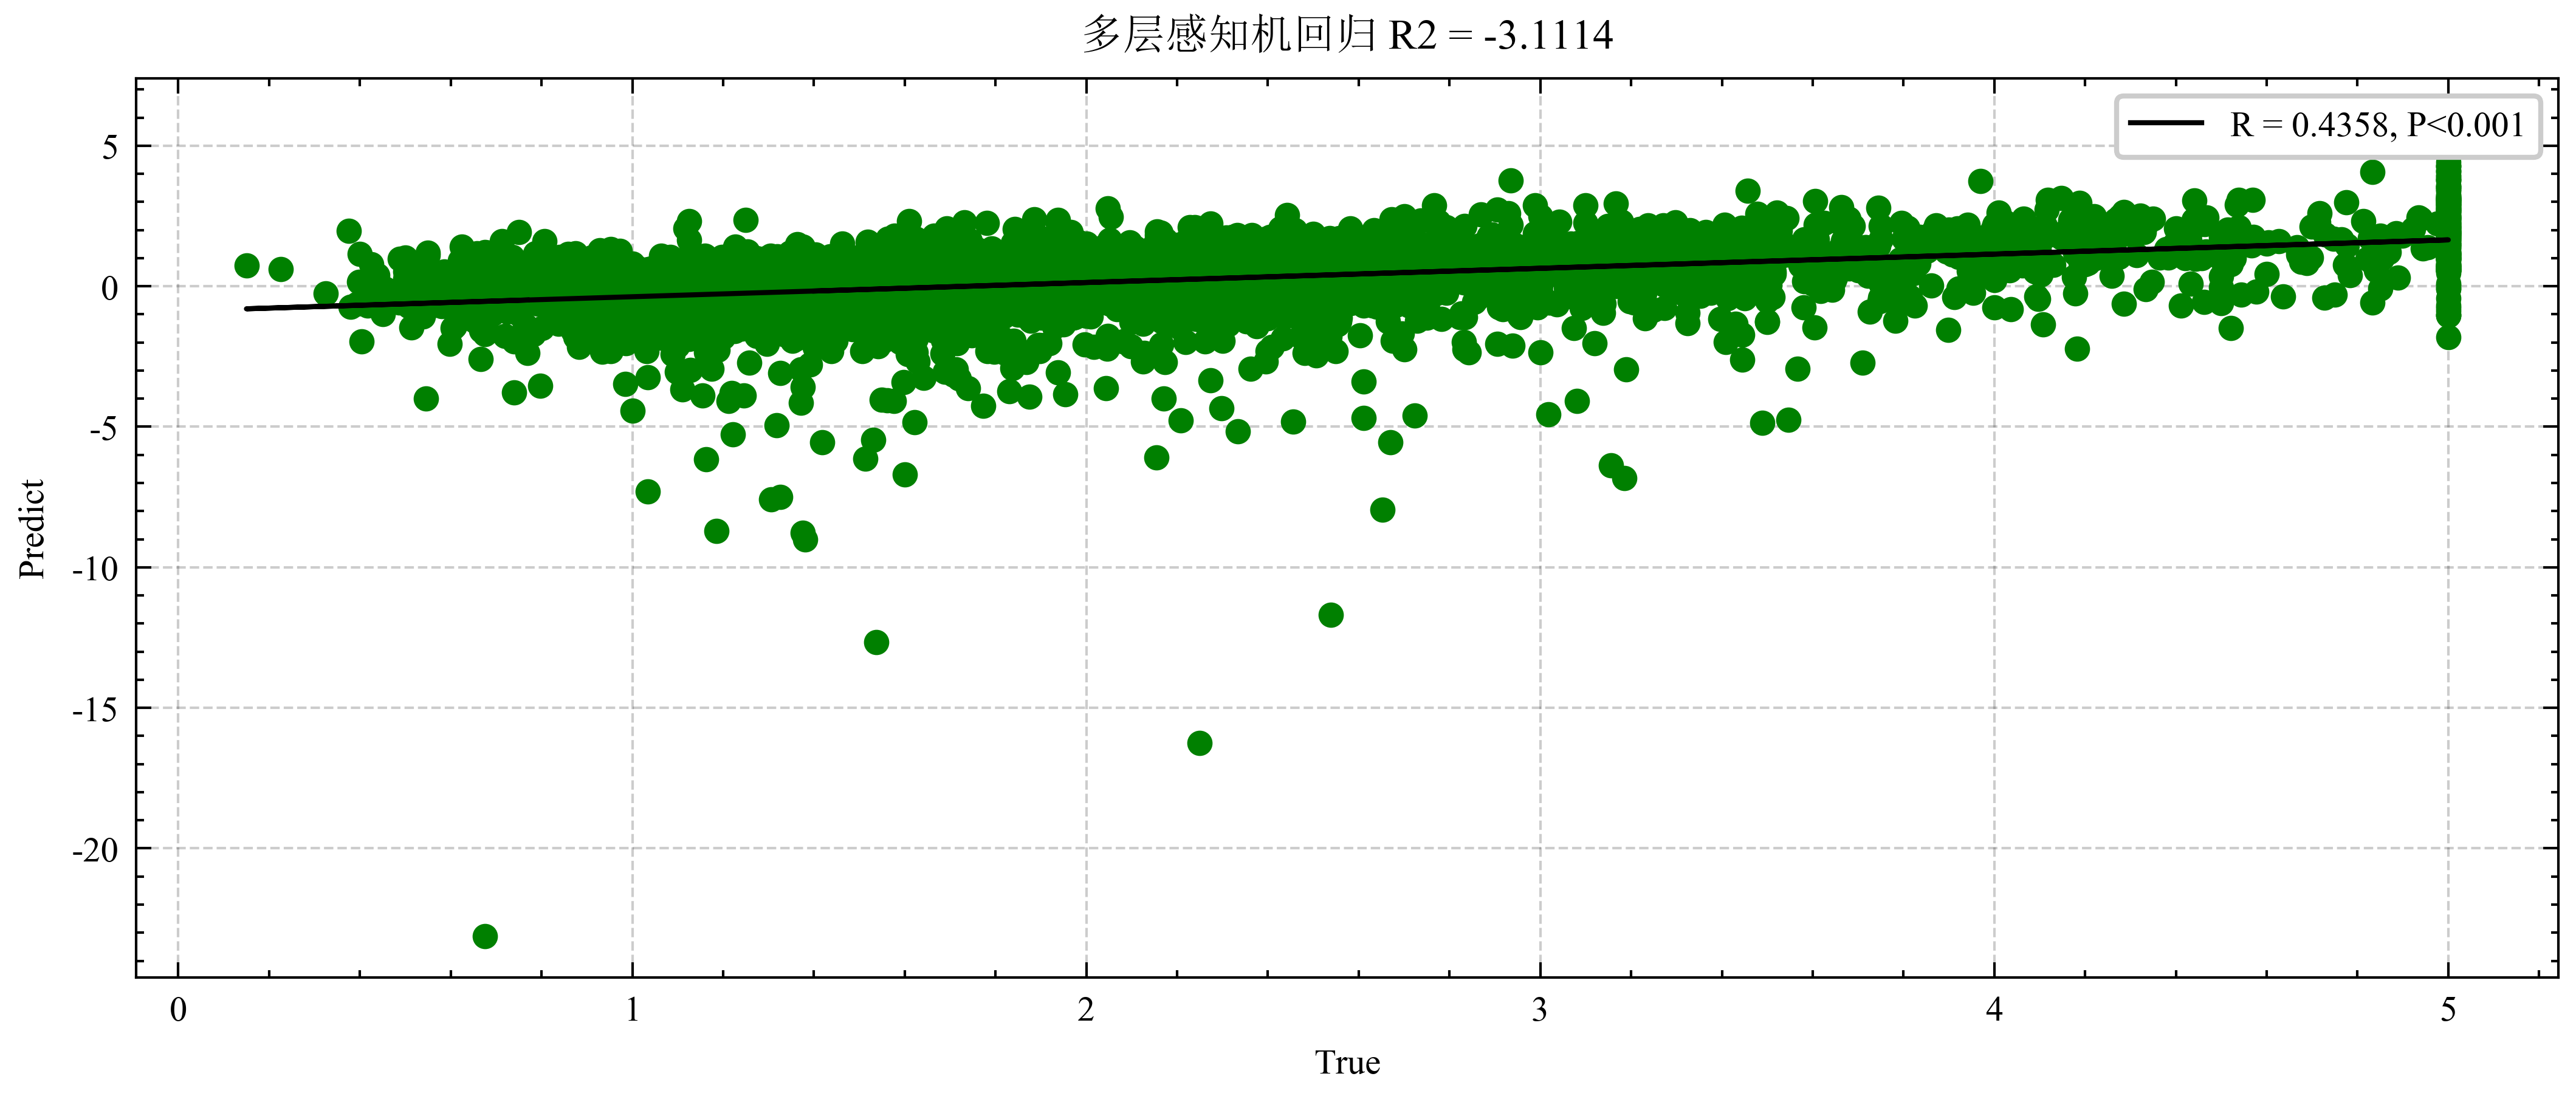

In [5]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

regs = [SVR(), KNeighborsRegressor(), MLPRegressor()]
names = ['SVR回归', 'KNN回归', '多层感知机回归']
for name, reg in zip(names, regs):
    reg.fit(train_x, train_y)
    r2 = reg.score(test_x, test_y)
    pred = reg.predict(test_x)

    print(f'{name}: {r2:.4f}')
    plot_pearsonr(test_y, pred, title=f'{name} R2 = {r2:.4f}')
    plt.show()

### 4. 集成学习-Boosting

AdaBoost回归: 0.5098


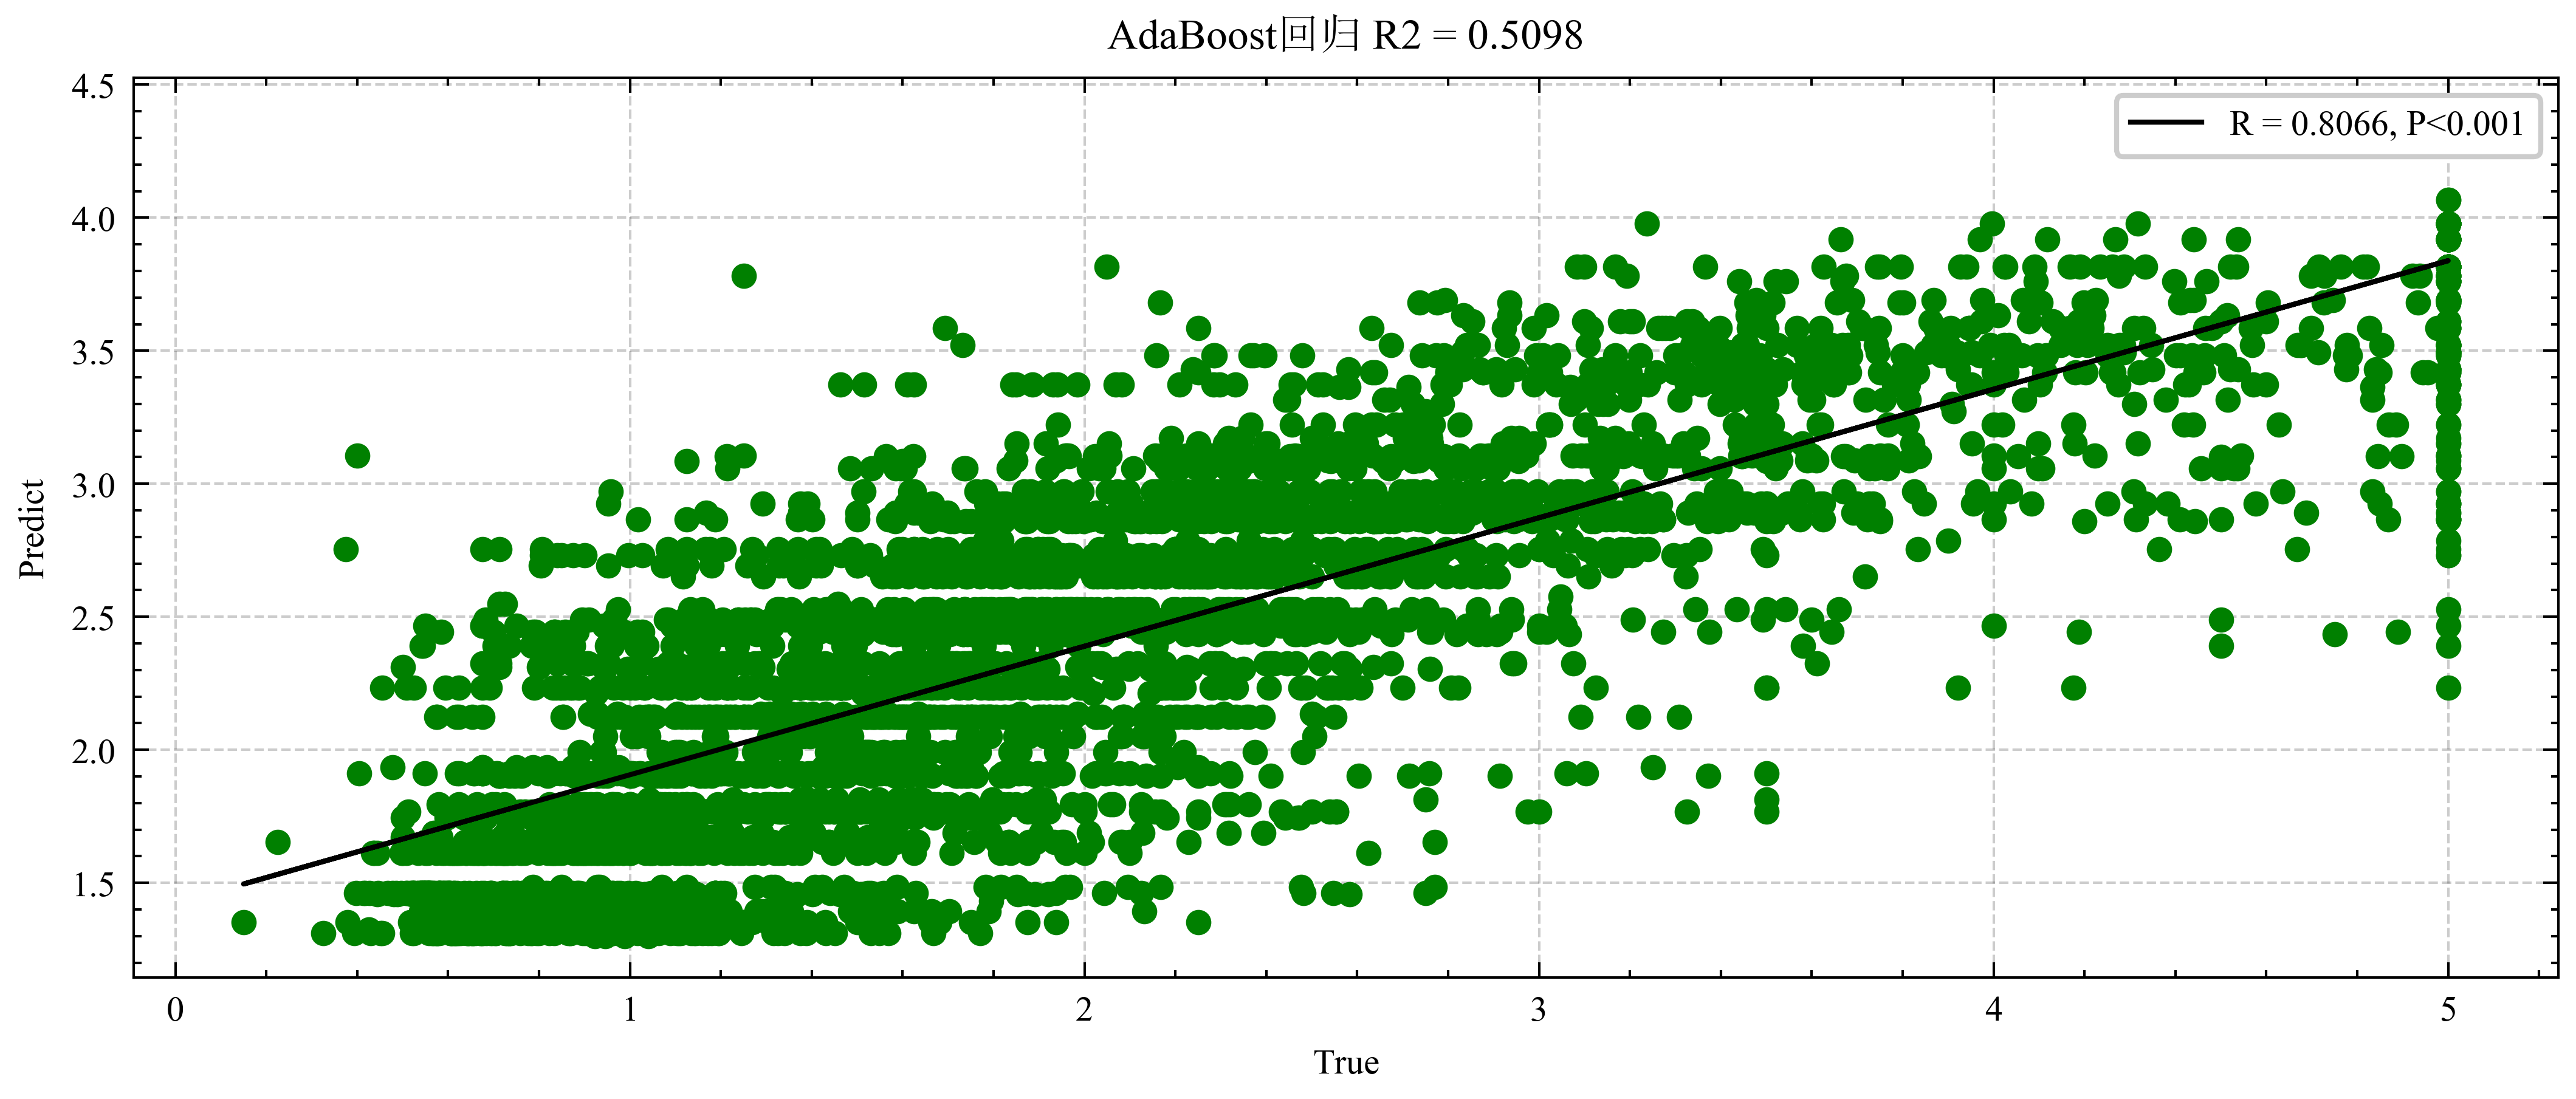

GBR回归: 0.7892


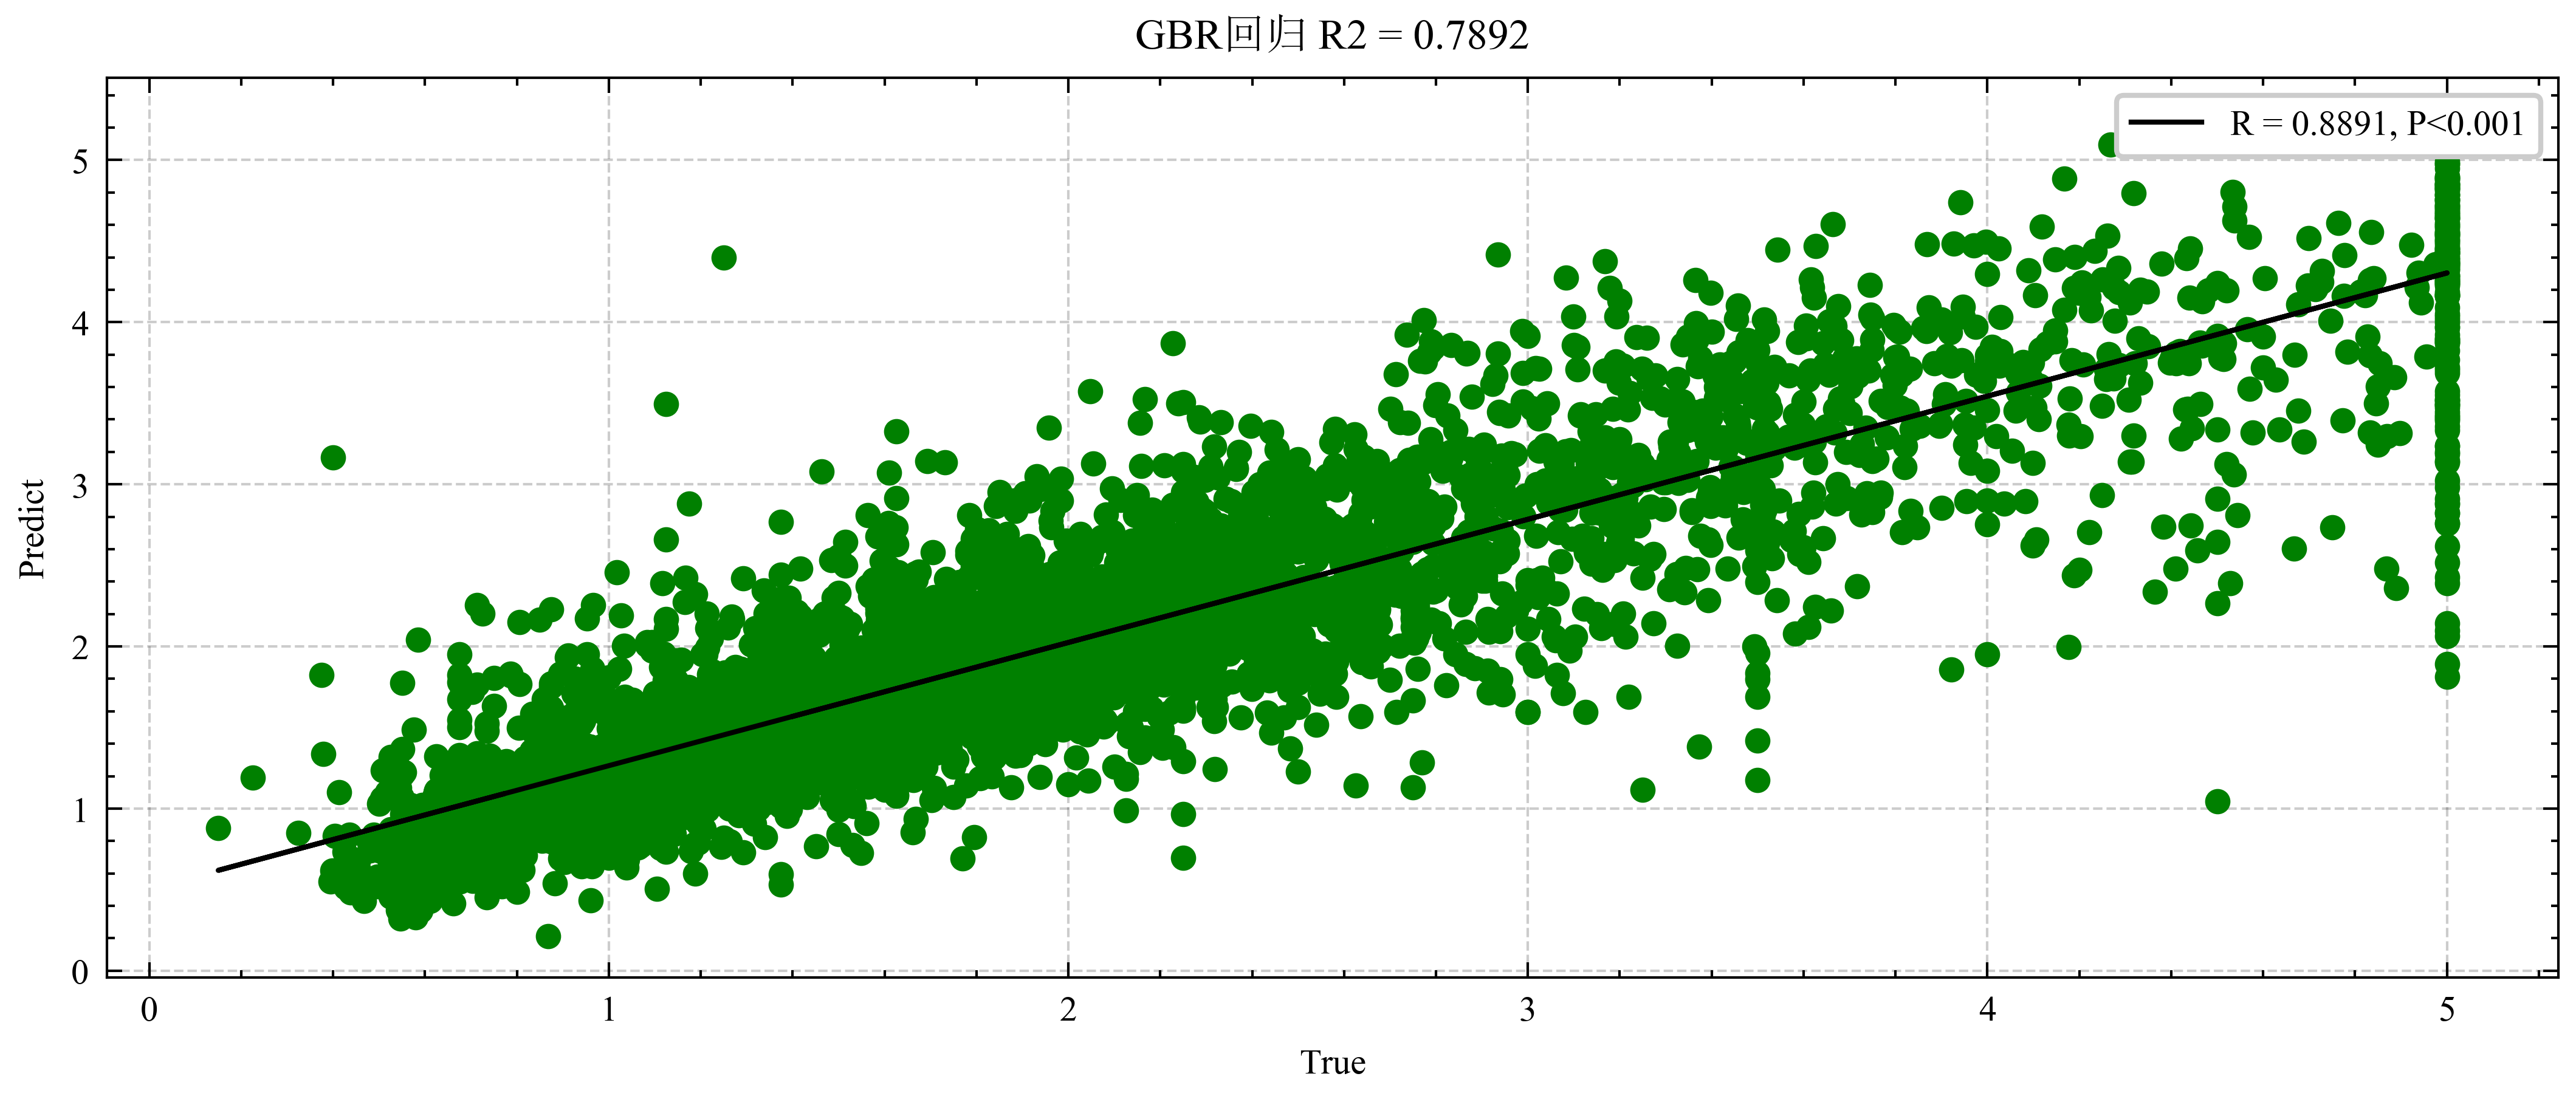

XGBoost回归: 0.8347


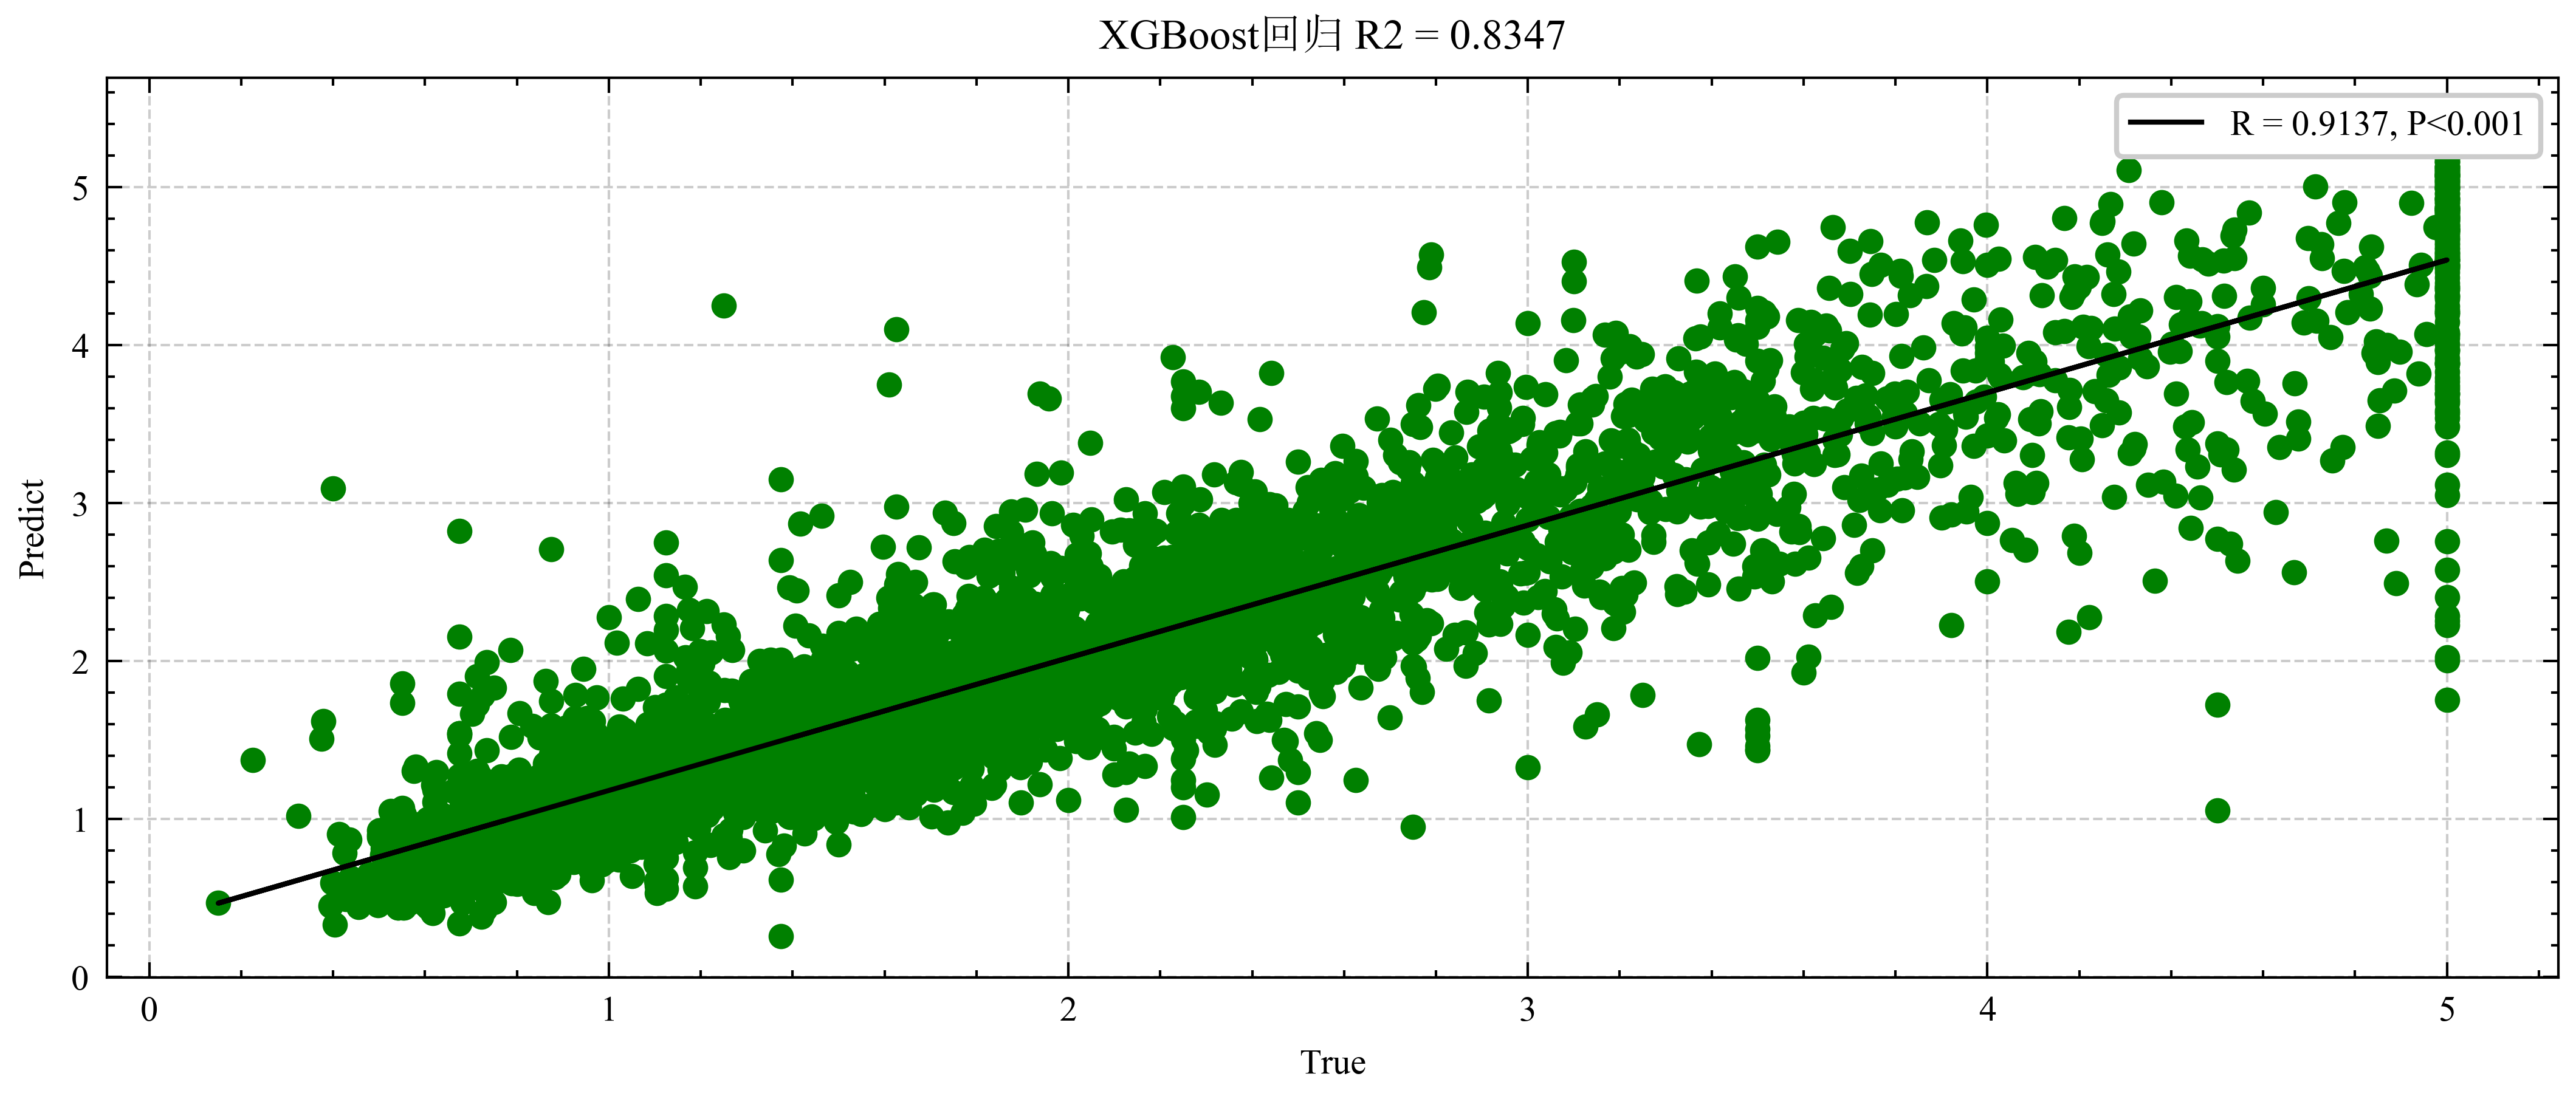

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.069705
LightGBM回归: 0.8387


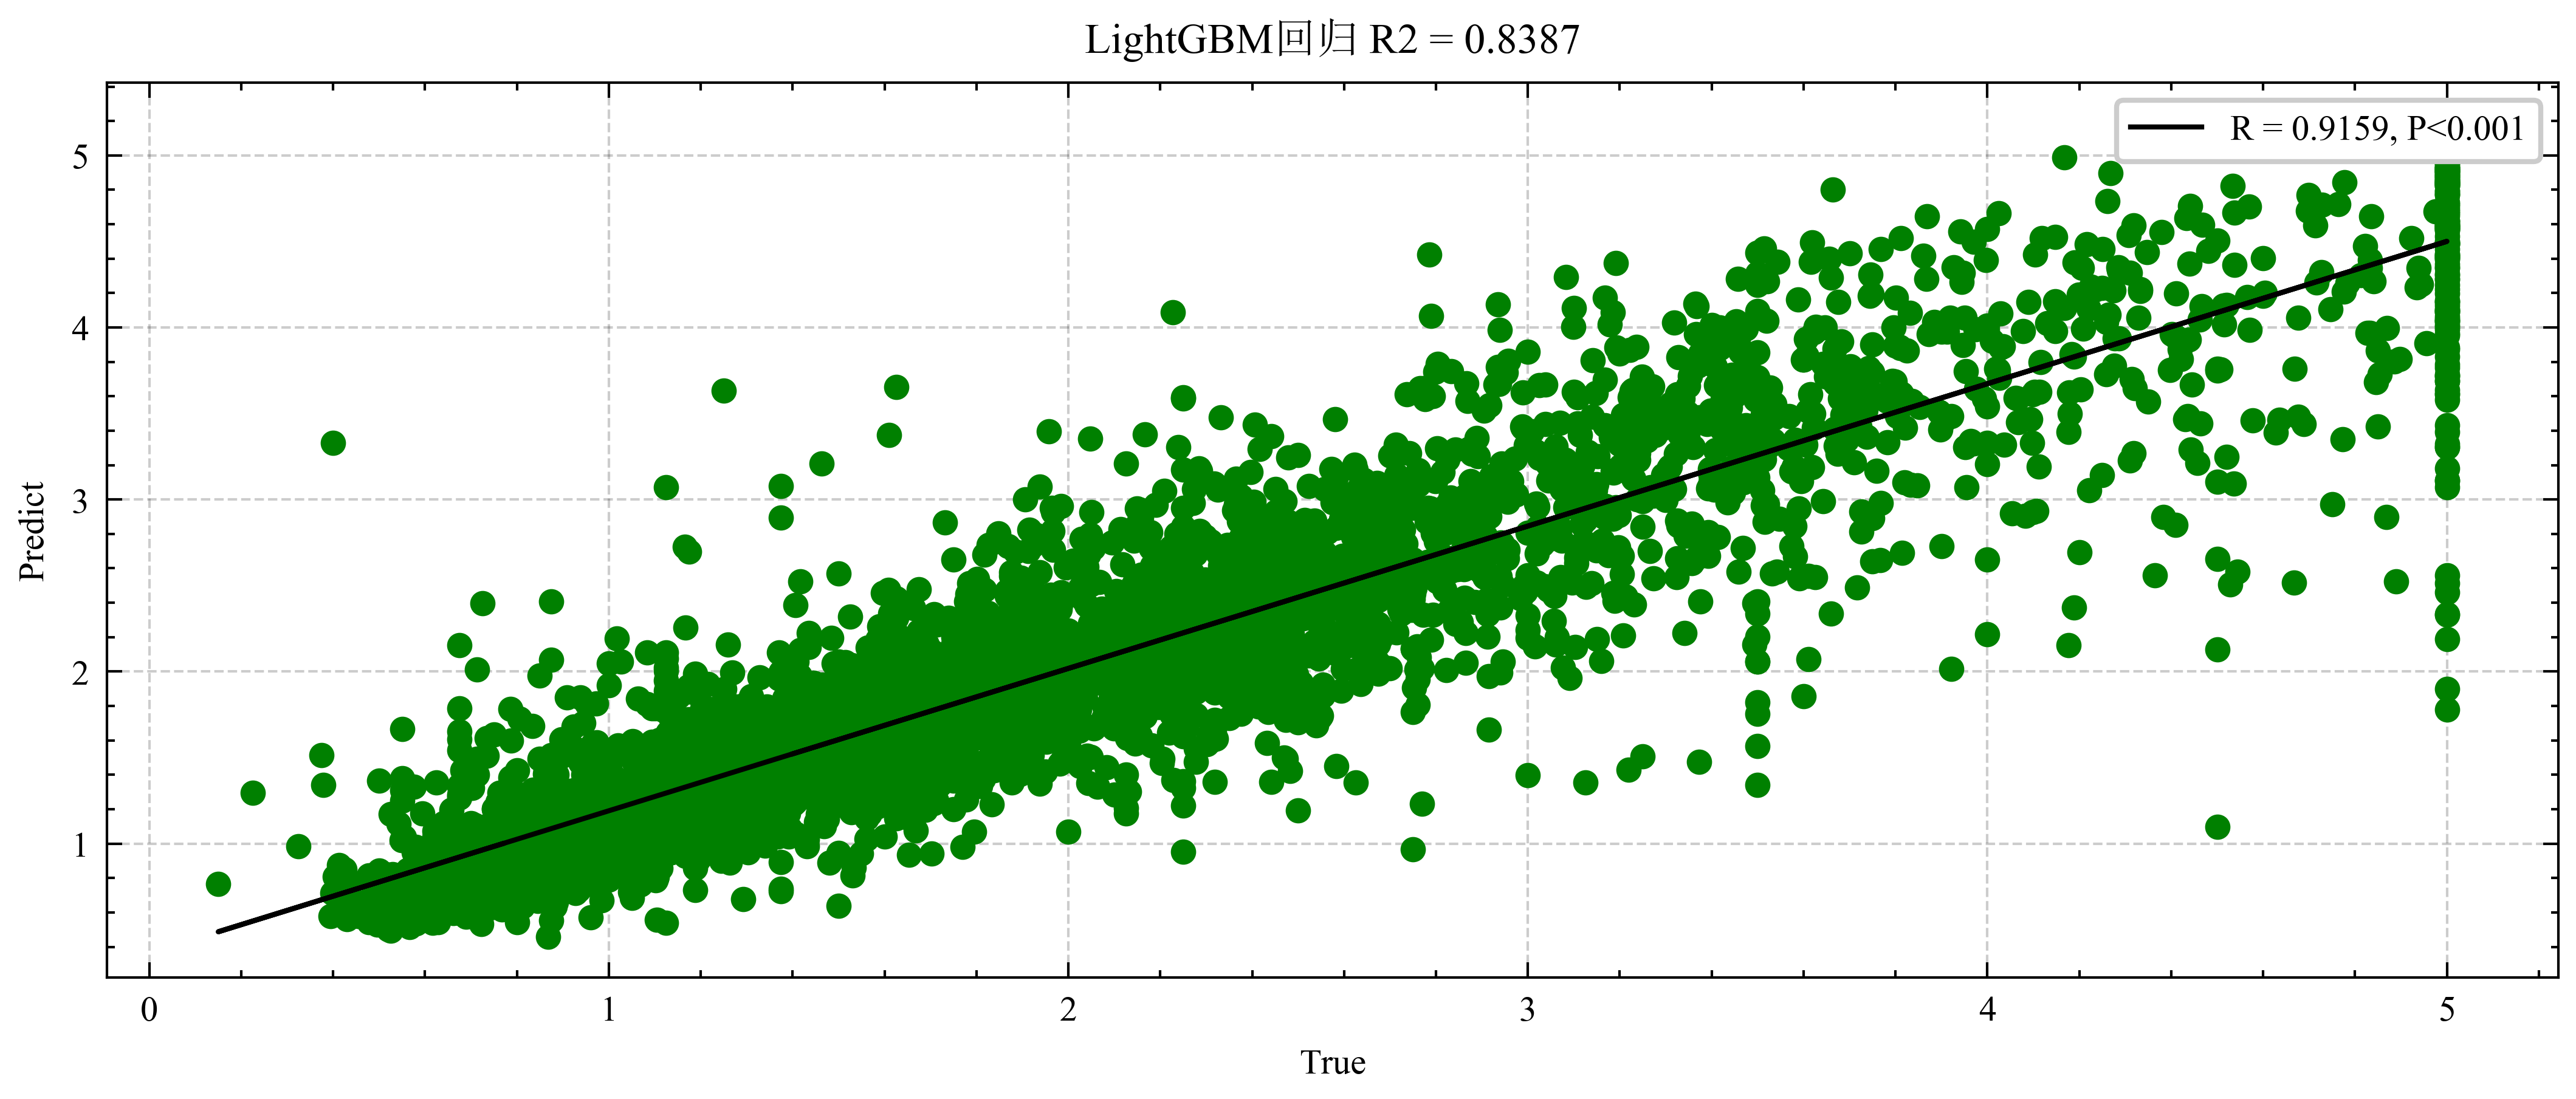

直方图梯度提升回归: 0.8371


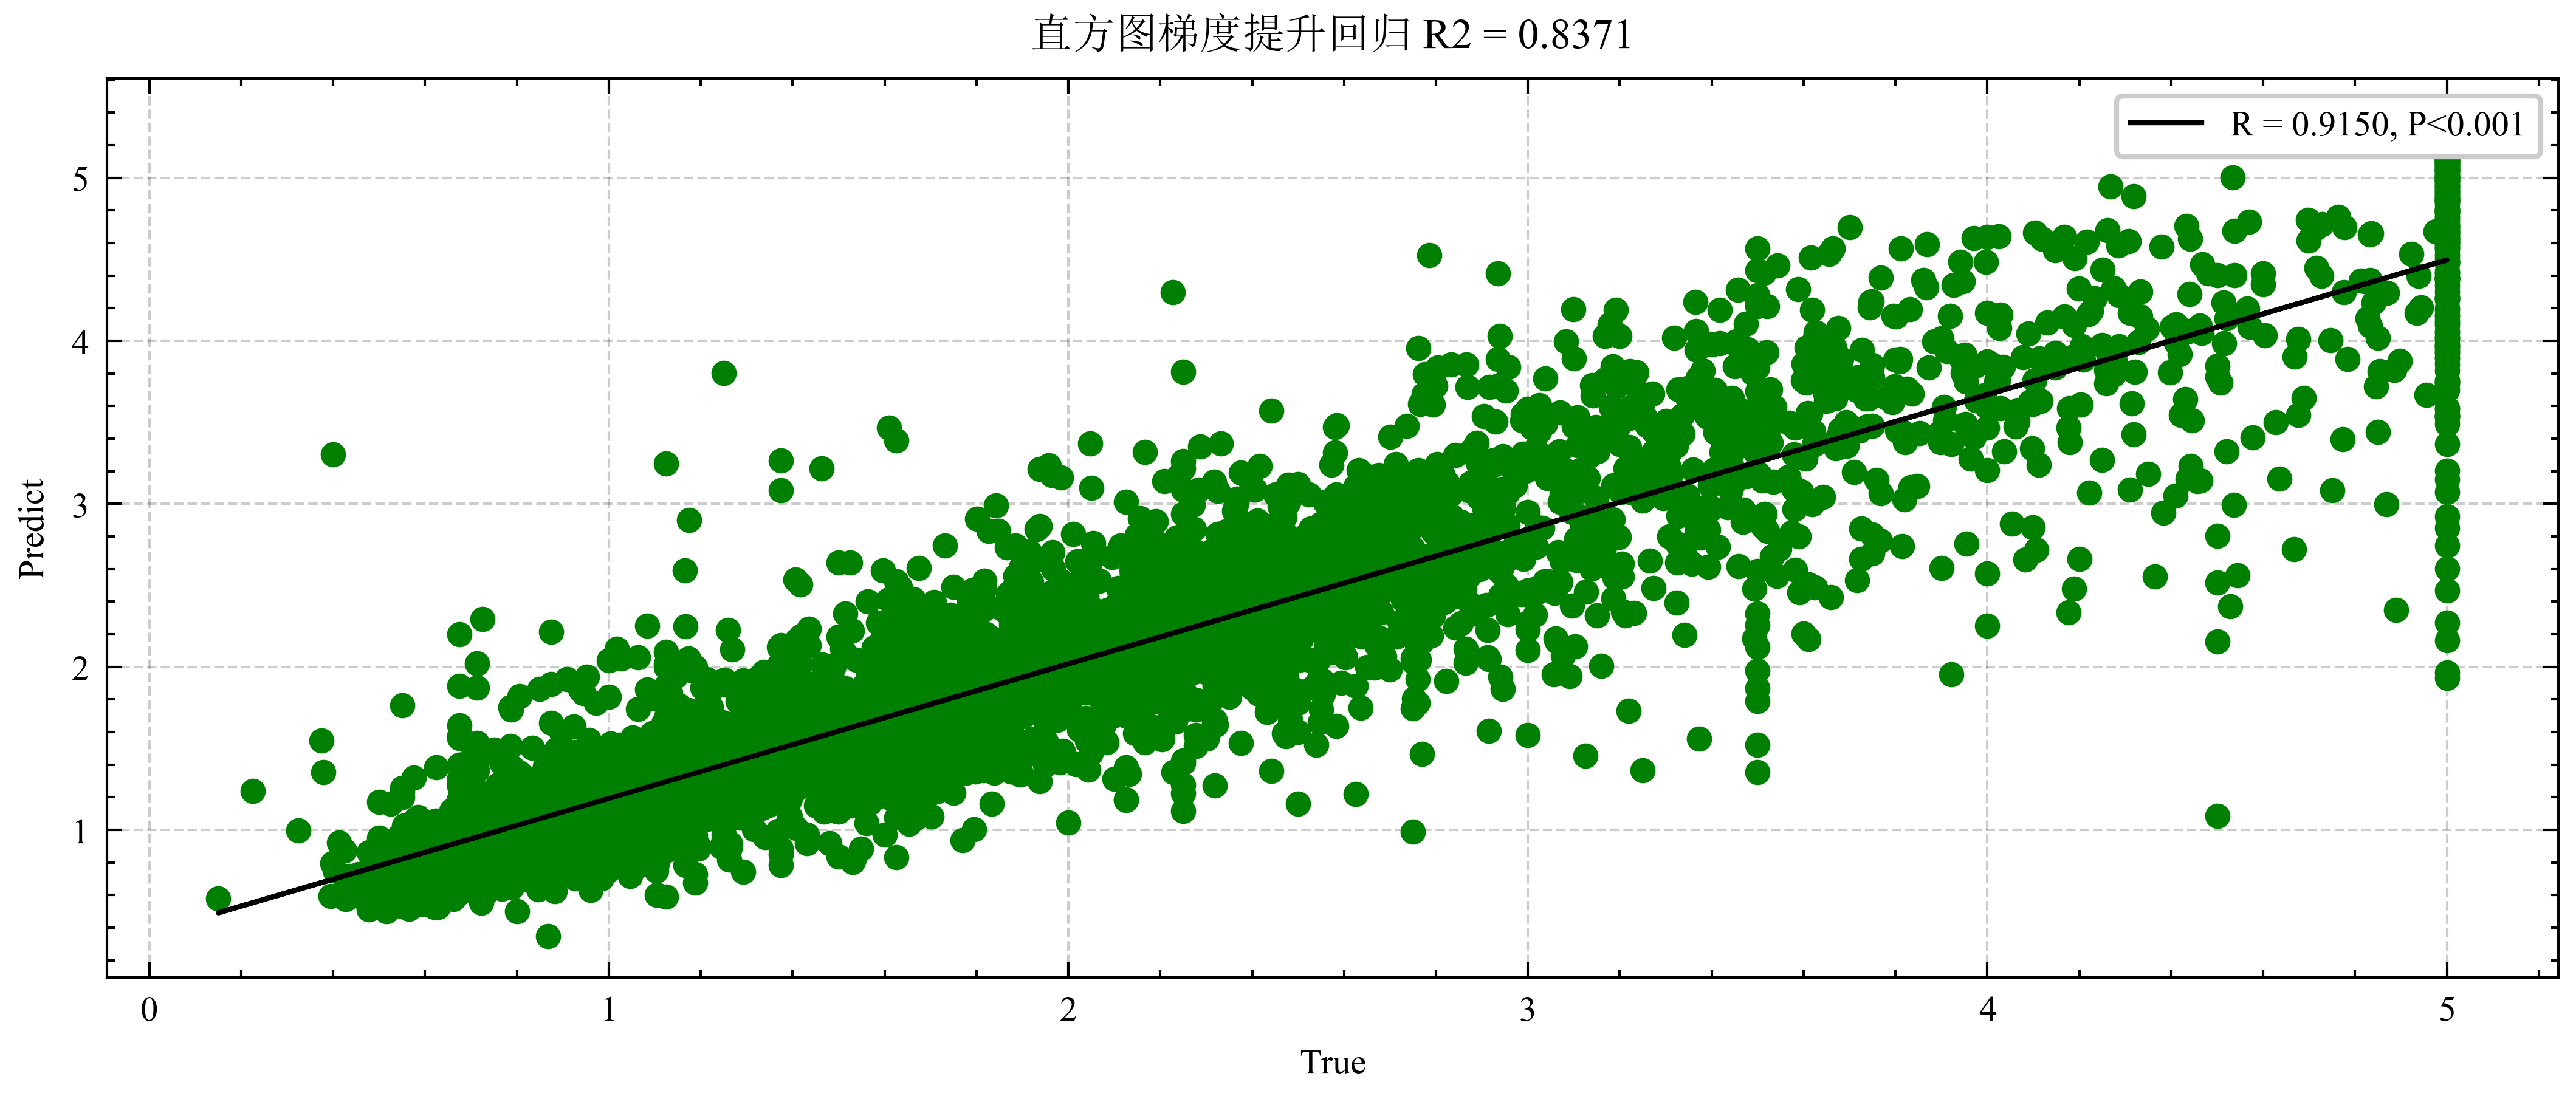

Learning rate set to 0.414564
0:	learn: 0.9168351	total: 150ms	remaining: 14.9s
1:	learn: 0.7938553	total: 155ms	remaining: 7.6s
2:	learn: 0.7178806	total: 160ms	remaining: 5.17s
3:	learn: 0.6575655	total: 164ms	remaining: 3.94s
4:	learn: 0.6321839	total: 169ms	remaining: 3.2s
5:	learn: 0.6133358	total: 173ms	remaining: 2.71s
6:	learn: 0.5910965	total: 178ms	remaining: 2.36s
7:	learn: 0.5730404	total: 183ms	remaining: 2.1s
8:	learn: 0.5654068	total: 187ms	remaining: 1.89s
9:	learn: 0.5595514	total: 192ms	remaining: 1.73s
10:	learn: 0.5497860	total: 197ms	remaining: 1.59s
11:	learn: 0.5459667	total: 201ms	remaining: 1.47s
12:	learn: 0.5397727	total: 206ms	remaining: 1.38s
13:	learn: 0.5366726	total: 211ms	remaining: 1.29s
14:	learn: 0.5313492	total: 215ms	remaining: 1.22s
15:	learn: 0.5259559	total: 220ms	remaining: 1.15s
16:	learn: 0.5215404	total: 224ms	remaining: 1.09s
17:	learn: 0.5169436	total: 229ms	remaining: 1.04s
18:	learn: 0.5132790	total: 233ms	remaining: 995ms
19:	learn: 0.5

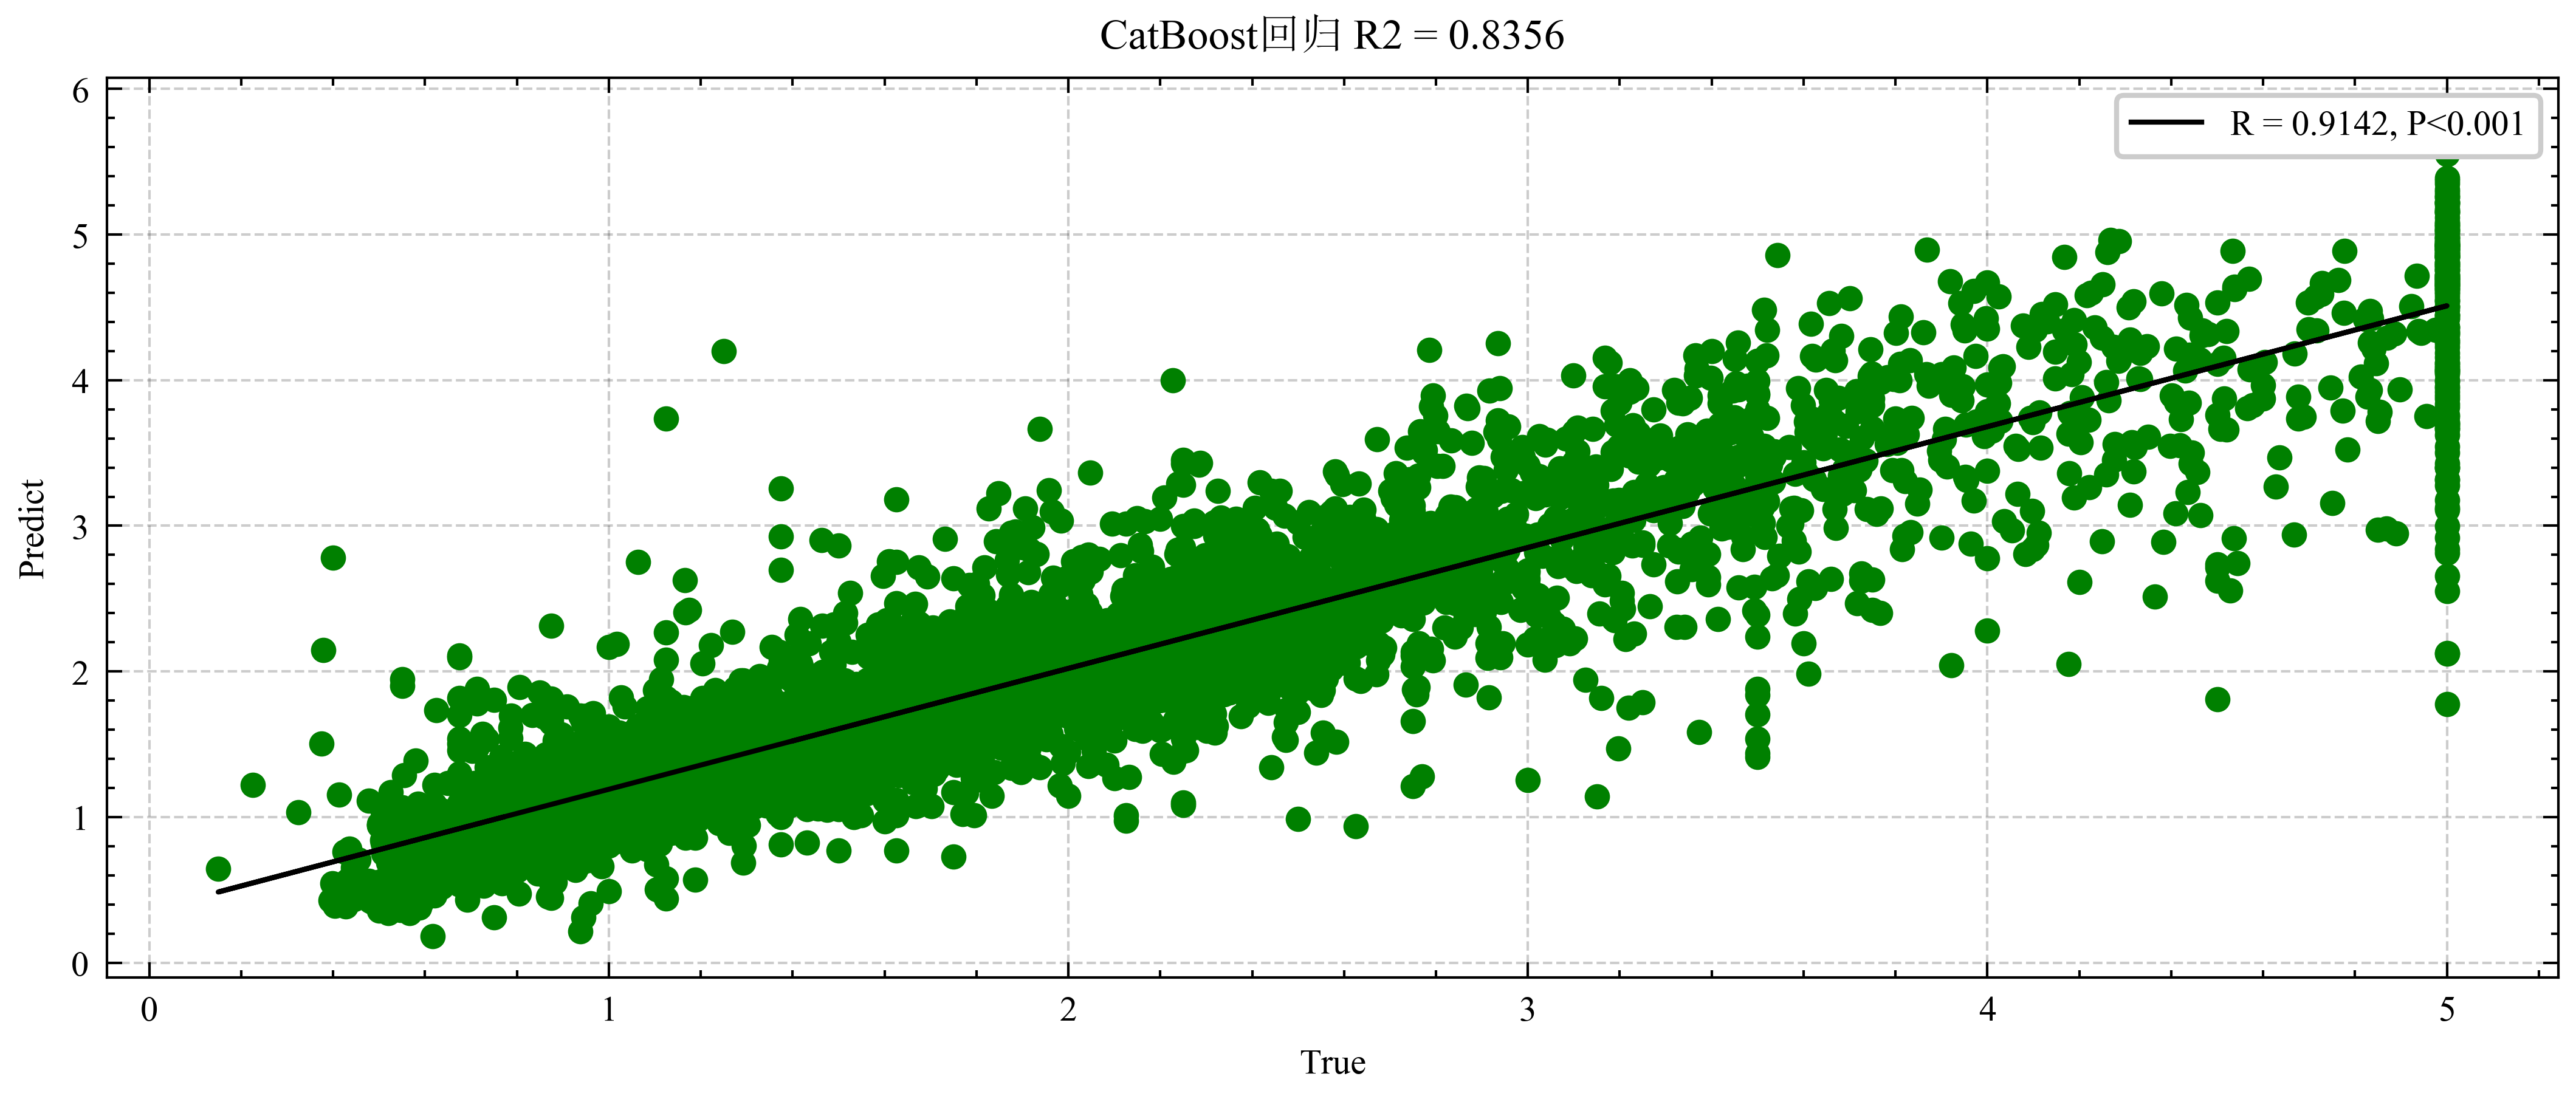

In [7]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

regs = [AdaBoostRegressor(n_estimators=100, random_state=22),
        GradientBoostingRegressor(n_estimators=100, random_state=22),
        XGBRegressor(n_estimators=100, random_state=22),
        LGBMRegressor(n_estimators=100, random_state=22),
        HistGradientBoostingRegressor(random_state=22),
        CatBoostRegressor(n_estimators=100, random_state=22)]
names = ['AdaBoost回归', 'GBR回归', 'XGBoost回归', 'LightGBM回归', '直方图梯度提升回归', 'CatBoost回归']
for name, reg in zip(names, regs):
    reg.fit(train_x, train_y)
    r2 = reg.score(test_x, test_y)
    pred = reg.predict(test_x)

    print(f'{name}: {r2:.4f}')
    plot_pearsonr(test_y, pred, title=f'{name} R2 = {r2:.4f}')
    plt.show()

### 5. 集成学习-Bagging

随机森林回归: 0.8135


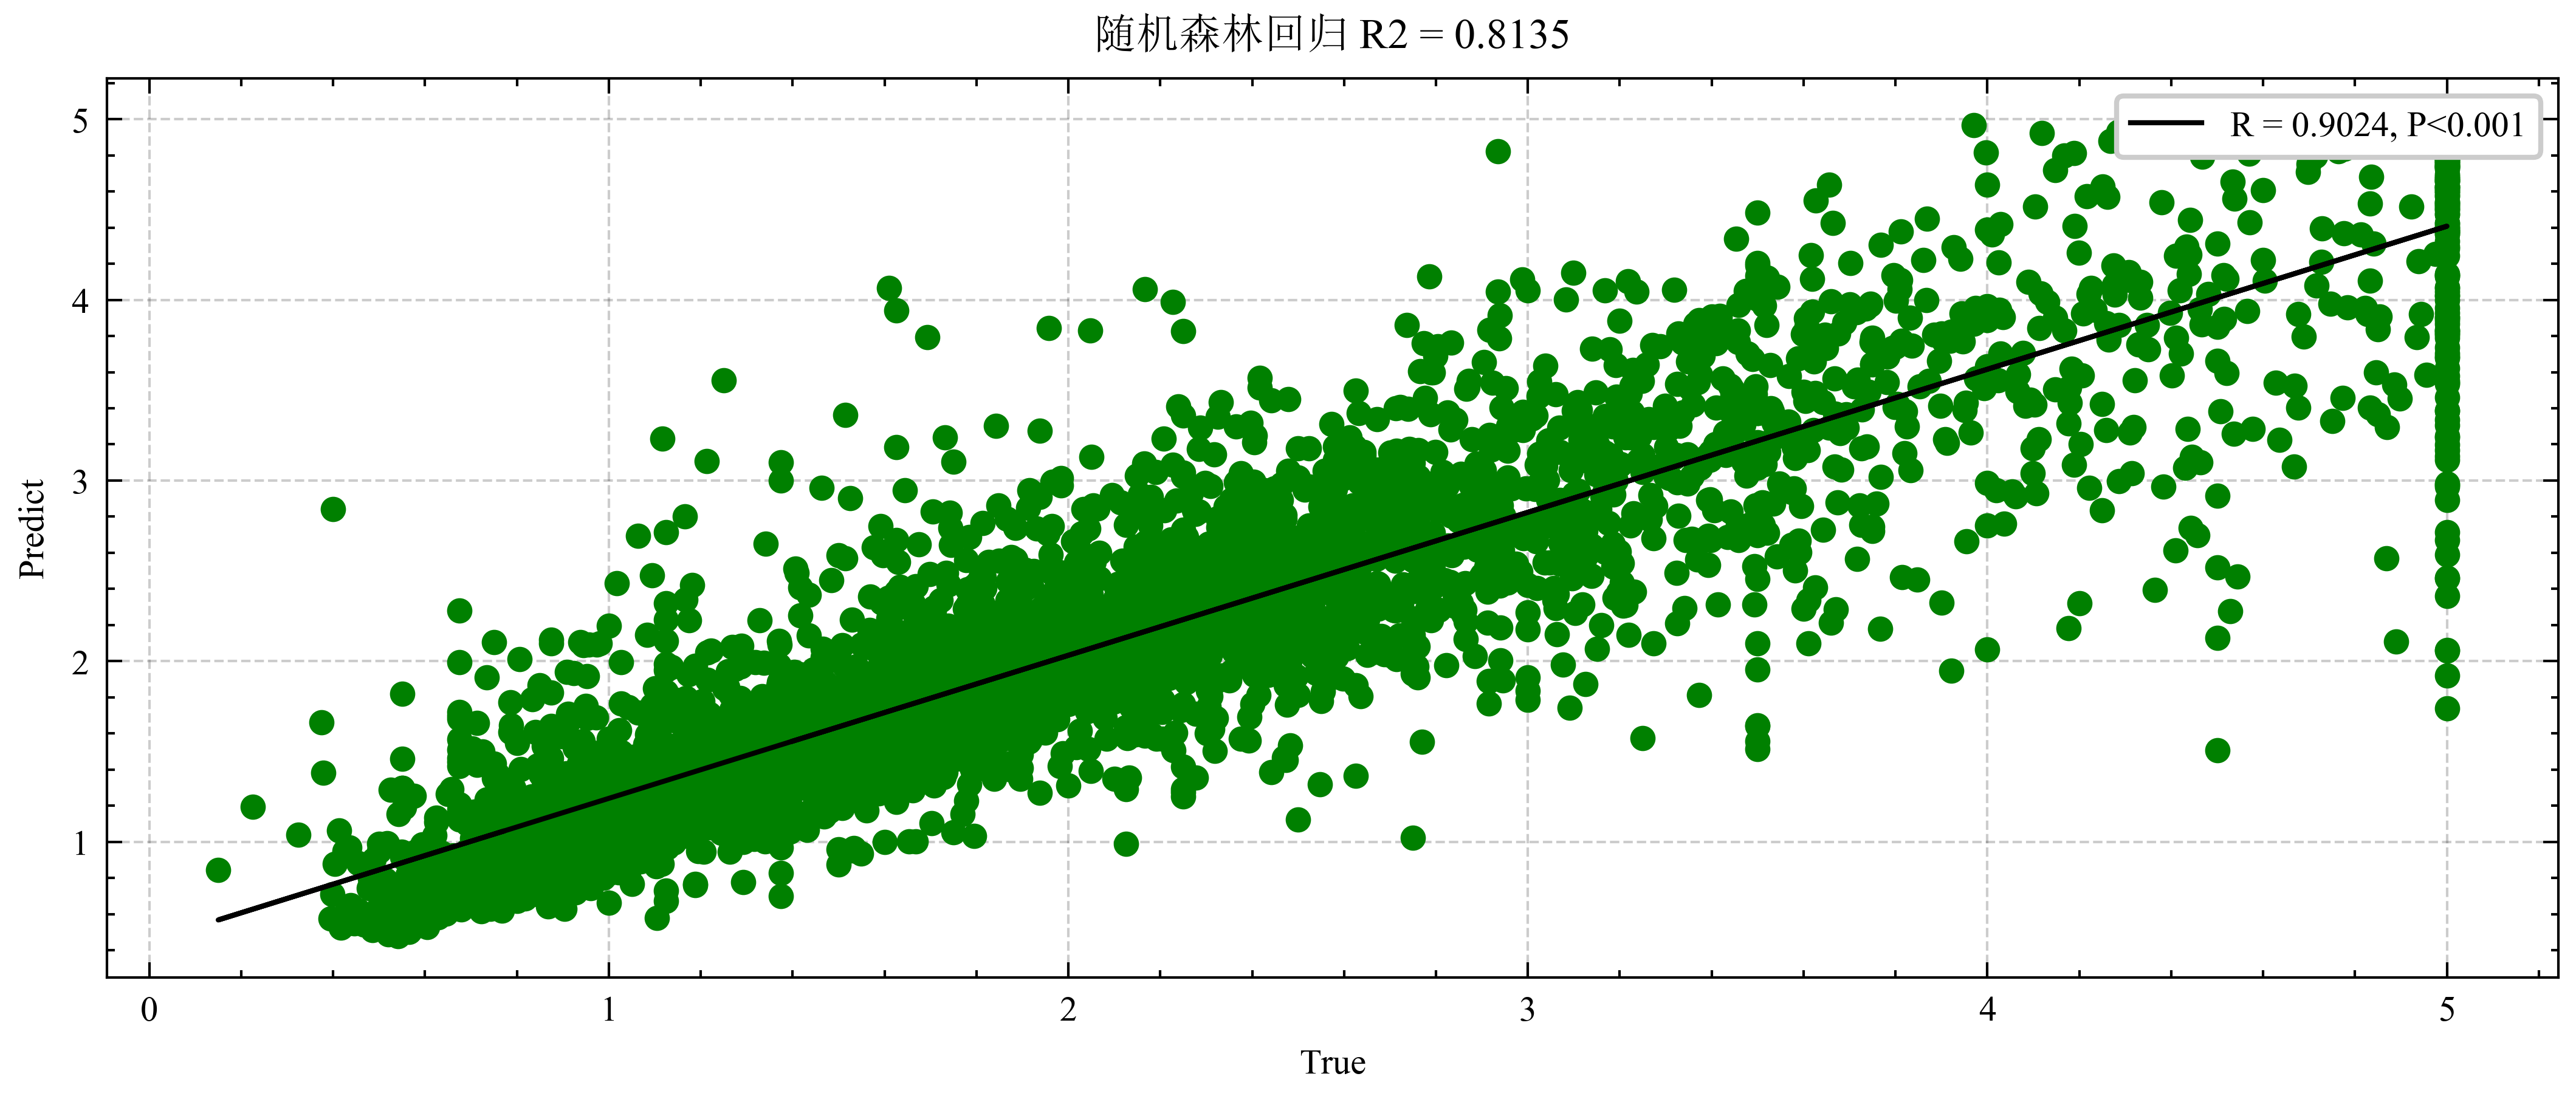

极端森林回归: 0.8163


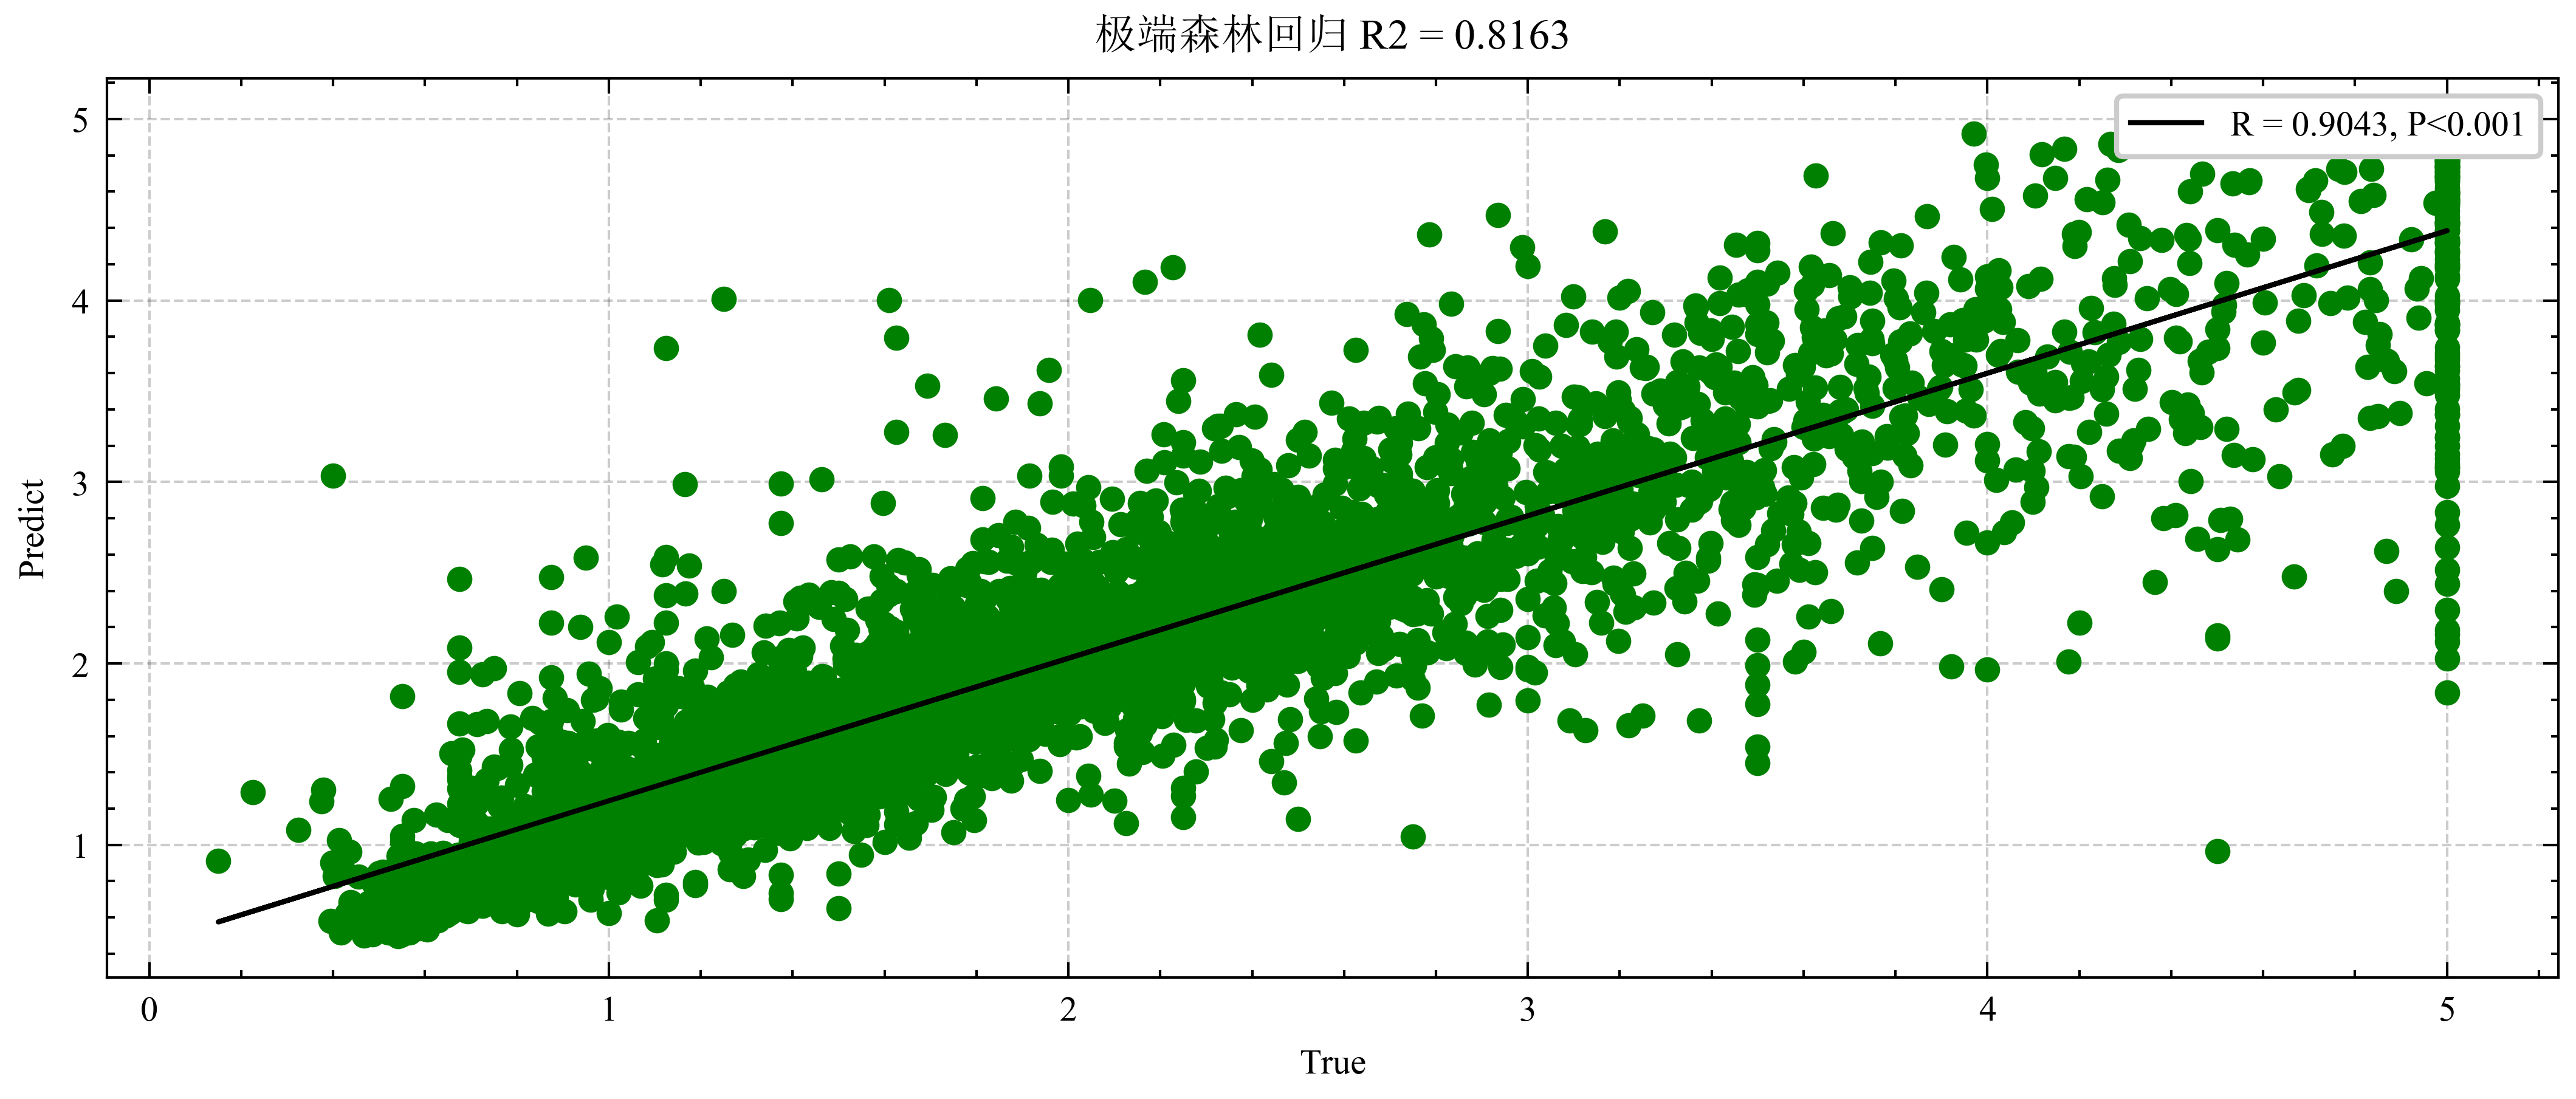

In [8]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

regs = [RandomForestRegressor(n_estimators=100, random_state=22),
        ExtraTreesRegressor(n_estimators=100, random_state=22)]
names = ['随机森林回归', '极端森林回归']
for name, reg in zip(names, regs):
    reg.fit(train_x, train_y)
    r2 = reg.score(test_x, test_y)
    pred = reg.predict(test_x)

    print(f'{name}: {r2:.4f}')
    plot_pearsonr(test_y, pred, title=f'{name} R2 = {r2:.4f}')
    plt.show()

汇总（模型均未调参，结果的意义有限）：

| 模型               | R2      |
| ------------------ | ------- |
| 多元线性回归       | 0.6094  |
| 岭回归             | 0.5969  |
| 决策树回归         | 0.6129  |
| 极端树回归         | 0.5803  |
| SVR回归            | -0.0258 |
| KNN回归            | 0.1549  |
| 多层感知机回归     | -3.1114 |
| AdaBoost回归       | 0.5098  |
| GBR回归            | 0.7892  |
| XGBoost回归        | 0.8347  |
| LightGBM回归       | 0.8387  |
| 直方图梯度提升回归 | 0.8371  |
| CatBoost回归       | 0.8356  |
| 随机森林回归       | 0.8135  |
| 极端森林回归       | 0.8163  |

## 贰丨查看学习曲线

In [9]:
def plot_learning_curve(estimator, title, train_x, train_y,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        save_path=None):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            train_x,
                                                            train_y,
                                                            cv=cv,
                                                            random_state=22,
                                                            n_jobs=n_jobs)

    figure, ax = plt.subplots(figsize=(7.05, 3), constrained_layout=True)

    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Test Score')
    ax.legend(loc='upper right')
    if save_path is None:
        return ax
    else:
        plt.savefig(f'{save_path}/{title}.webp')
        plt.close()

In [10]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor

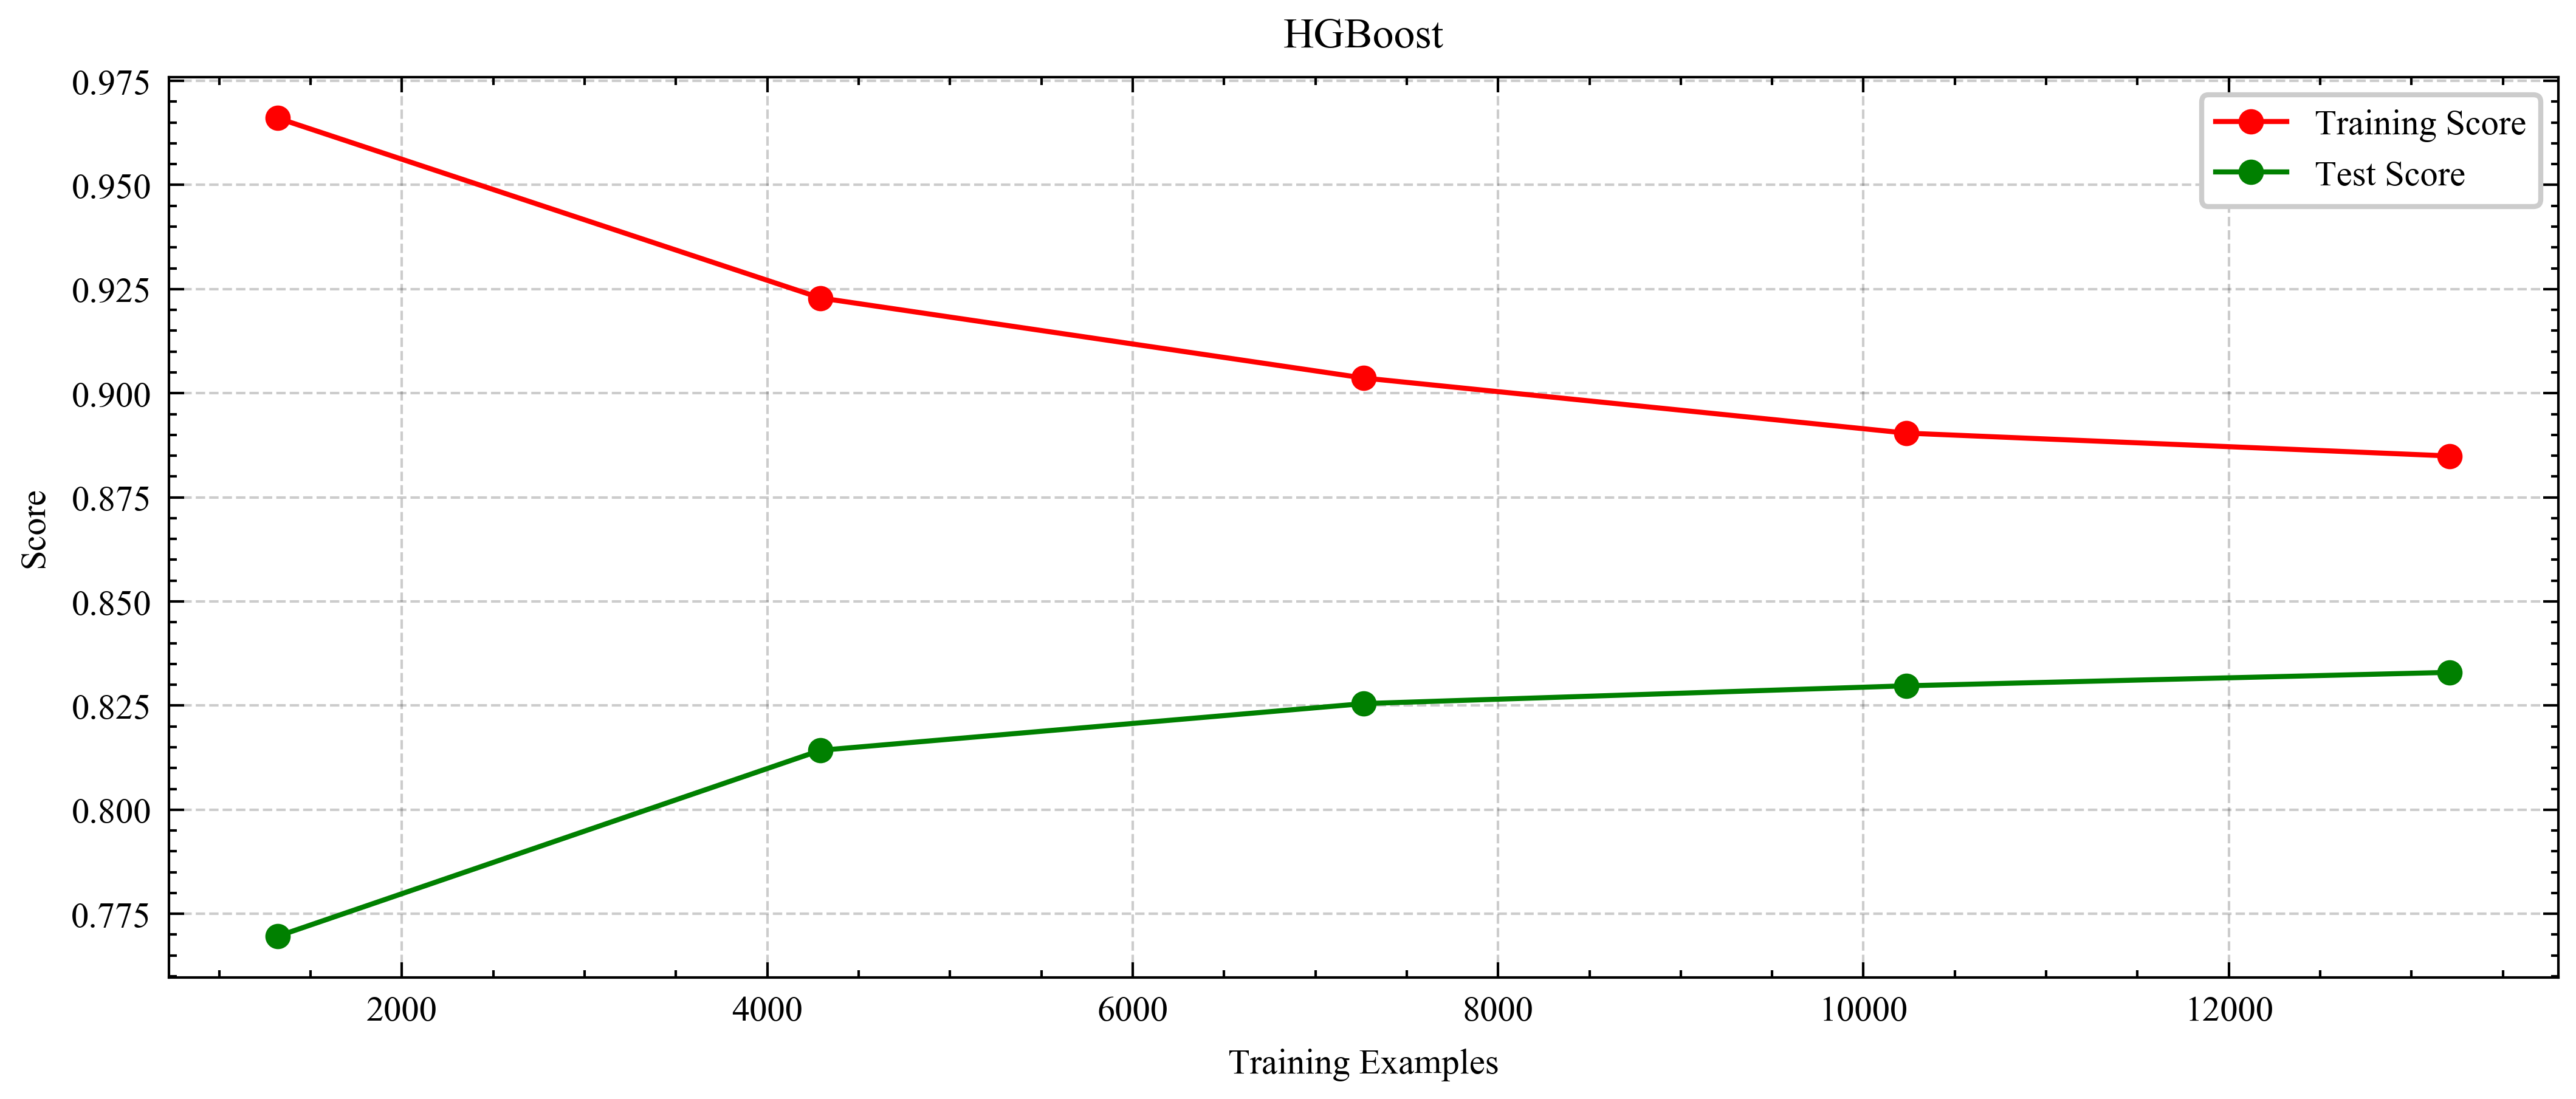

In [11]:
cv = KFold(n_splits=5, shuffle=True, random_state=22)
ax = plot_learning_curve(HistGradientBoostingRegressor(random_state=22), 'HGBoost', train_x, train_y, cv=cv)
plt.show()

衡量模型在未知数据上准确率的指标，叫泛化误差（Genelization Error），由方差（var）、偏差（bais）和噪声（epslon）决定
$$
E(f;D)=bias^2+var+\epsilon^2
$$